
#### **Python & Qiskit Setup**

Our objective in this course is doing machine learning through quantum computing. To achieve this a series of exercises will be solved by quantum circuits. All circuits will be executed through a local simulator. A separate notebook explains how to submit circuits to be runned at IBM Quantum Computers. Besides `qiskit`, it will be heavly used `numpy`, matplotlib's `pyplot`, `pandas`, and `scikit-learn`. The option `-q` installs them silently.

In [ ]:
# Setup básico
!pip install qiskit -q
!pip install qiskit[visualization] -q
import qiskit as qk

!pip install qiskit-aer -q
import qiskit_aer as qk_aer

import numpy as np
np.set_printoptions(precision=3, suppress=True)

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.3 MB/s eta 0:00:00


#### **Quantum Algorithms**

##### **Simon's Algorithm**

###### **Introduction: Example with $n=2$ and $c=11$**

The third algorithm is about finding a pattern in a function. In this case we are talking about a function that maps an $n$ digits binary number into another. In math terms: $\{0,1\}^n \rightarrow \{0,1\}^n$ .

In Simon's algorithm the mapping is: $f(x) = f(x \oplus c)$. The operation $\oplus$ is bitwise XOR. It is a XOR operation made by comparing bits in the same positions on both numbers $x$ and $c$ and getting another number as a result. In a XOR operation $0 \oplus x = x$ and $x \oplus x = 0$. This will be important when deploying the function through a quantum circuit.

Let's first define a function $f(x)$ such that $f(x) = f(x \oplus c)$. As stated in the section title let's work with $n=2$ and $c=11$. The table below represents this function:

$$\begin{array}{c|c|c}
x & x \oplus c & f(x) = f(x \oplus c) \\
\hline
00 & 00 \oplus 11 = 11 & f(00) = f(11) = 00 \\
01 & 01 \oplus 11 = 10 & f(01) = f(10) = 11 \\
10 & 10 \oplus 11 = 01 & f(10) = f(01) = 11 \\
11 & 11 \oplus 11 = 00 & f(11) = f(00) = 00 \\
\end{array}$$

To be implemented in a quantum computer the transformation must be reversible. Let's make it $|0,x\rangle \rightarrow |0 \oplus f(x), x \rangle$. If we apply it again we will get $|0 \oplus f(x), x \rangle \rightarrow |0 \oplus f(x) \oplus f(x), x \rangle \rightarrow |0 \oplus 0, x \rangle \rightarrow |0,x\rangle$. Therefore we will create a quantum circuit that makes $|0,x\rangle \rightarrow |f(x),x\rangle$ (see below).

$$|00,x_1x_0\rangle \rightarrow |f(x_1x_0),x_1x_0\rangle \rightarrow |y_1y_0,x_1x_0\rangle$$
$$|00,00\rangle \rightarrow |f(00),00\rangle \rightarrow |00,00\rangle$$
$$|00,01\rangle \rightarrow |f(01),01\rangle \rightarrow |11,00\rangle$$
$$|00,10\rangle \rightarrow |f(10),10\rangle \rightarrow |11,00\rangle$$
$$|00,11\rangle \rightarrow |f(11),11\rangle \rightarrow |00,00\rangle$$

The circuit below provides this transformation:

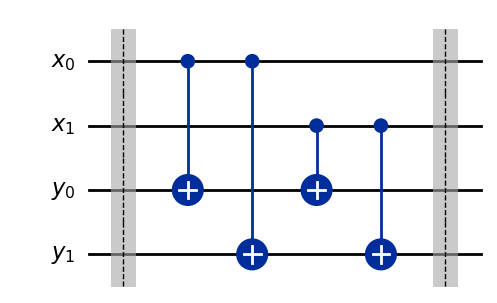

In [ ]:
import qiskit as qk

qrx = qk.QuantumRegister(2,'x')
qry = qk.QuantumRegister(2,'y')
qc = qk.QuantumCircuit(qrx,qry)

qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.cx(1,2)
qc.cx(1,3)
qc.barrier()

qc.draw('mpl')

Let's analyze it. Starting with state $| y_1 y_0 x_1 x_0 \rangle$ the circuit applies four $CNOT_{ab}$ gates with $a$ as slave and $b$ as master. The transformation sequence can be seen below:

$$\begin{array}{c|c|c|c|c}
              & CNOT_{y_0x_0} & CNOT_{y_1x_0} & CNOT_{y_0x_1} & CNOT_{y_1x_1} \\
\hdashline
y_1y_0,x_1x_0 & y_1y_0,x_1x_0 & y_1y_0,x_1x_0 & y_1y_0,x_1x_0 & y_1y_0,x_1x_0 \\
\hline
00,00 &  00,00 & 00,00 & 00,00 & 00,00 \\
00,01 &  01,01 & 11,01 & 11,01 & 11,01 \\
00,10 &  00,10 & 00,10 & 01,10 & 11,10 \\
00,11 &  01,11 & 11,11 & 10,11 & 00,11 \\
\end{array}$$

To test our model we create a function that receives the initial states of two qubits and displays the circuit's drawing and results histogram.

In [ ]:
def histograma(qc):
  simulador = qk_aer.Aer.get_backend('aer_simulator')
  resultado = simulator.run(qk.transpile(qc,simulator),shots=10000).result()
  contagens = resultado.get_counts()
  grafico = qk.visualization.plot_histogram(contagens)
  return(grafico)

In [ ]:
def simon(initial_y, initial_x):
  import qiskit as qk
  qrx = qk.QuantumRegister(2,'x')
  crx = qk.ClassicalRegister(4,'c')
  qry = qk.QuantumRegister(2,'y')

  qc = qk.QuantumCircuit(qrx,qry,crx)

  qc.initialize(initial_x,qrx)
  qc.initialize(initial_y,qry)

  qc.barrier()
  qc.cx(0,2)
  qc.cx(0,3)
  qc.cx(1,2)
  qc.cx(1,3)
  qc.barrier()

  qc.measure([0,1,2,3],[0,1,2,3])

  display(qc.draw('mpl'))
  grafico = histograma(qc)
  return(grafico)

###### **Example with $n=2$ and $c=11$: Quantum Circuit with Classical Input Output States**

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0000\rangle \rightarrow |0000\rangle$

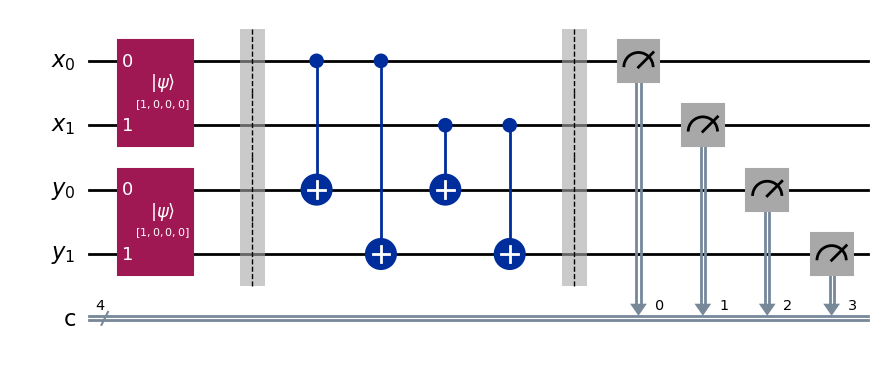

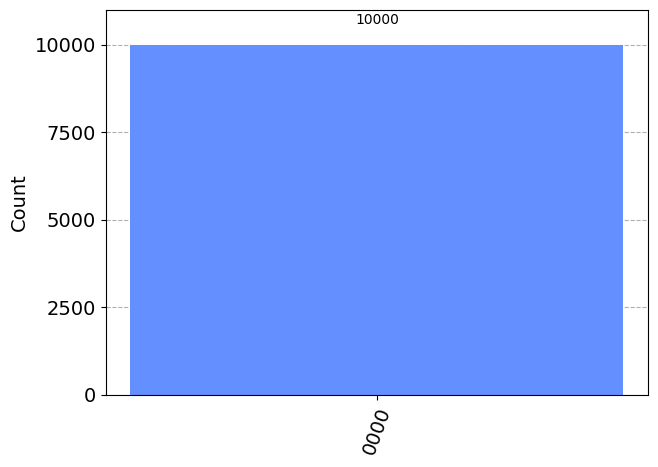

In [ ]:
simon([1,0,0,0],[1,0,0,0])

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0011\rangle \rightarrow |0011\rangle$

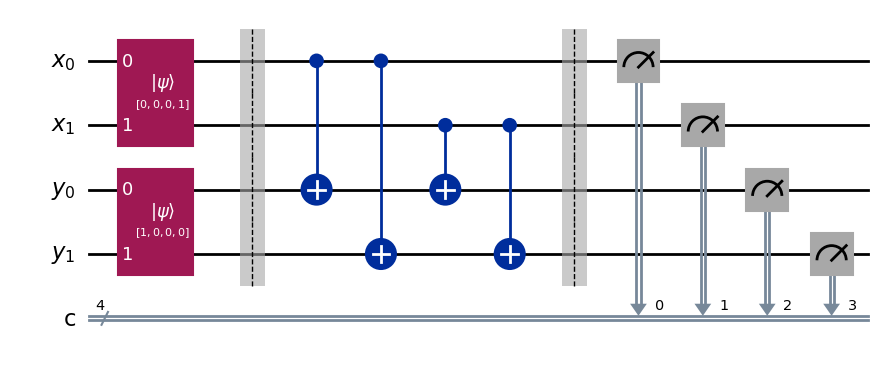

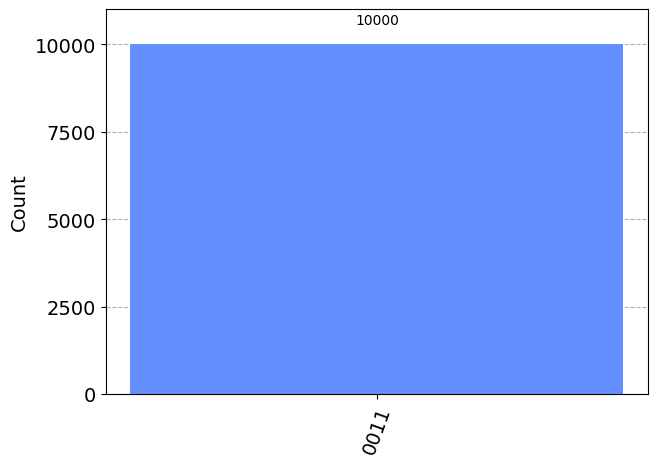

In [ ]:
simon([1,0,0,0],[0,0,0,1])

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0001\rangle \rightarrow |1101\rangle$

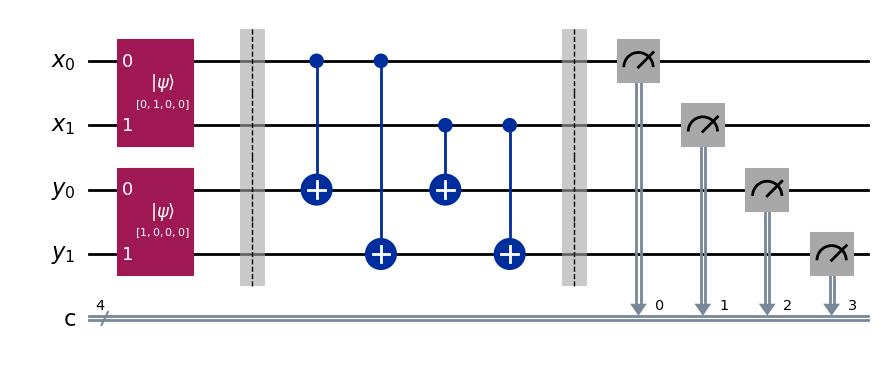

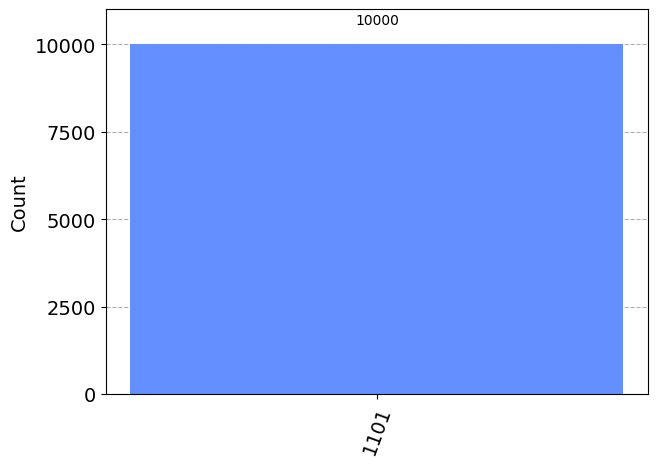

In [ ]:
simon([1,0,0,0],[0,1,0,0])

The circuit below shows that $|y_1y_0x_1x_0\rangle = |0010\rangle \rightarrow |1110\rangle$

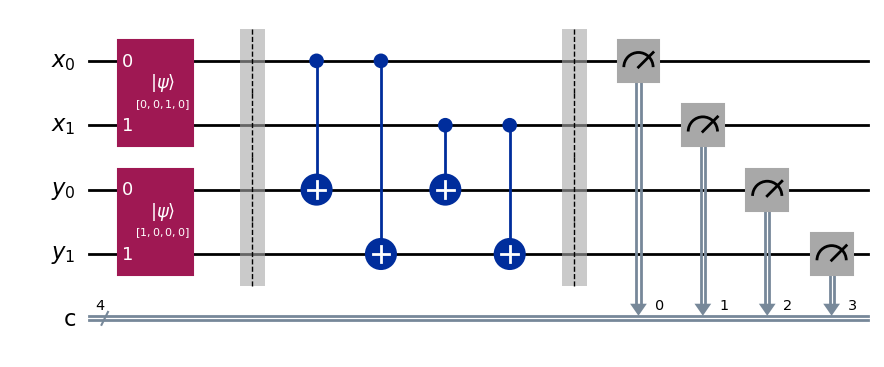

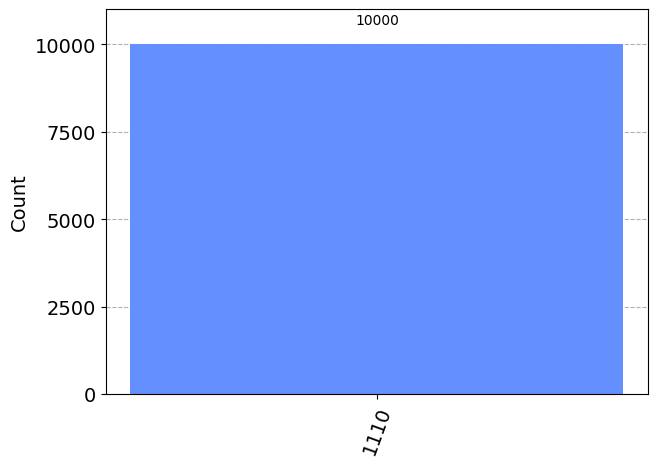

In [ ]:
simon([1,0,0,0],[0,0,1,0])

###### **Example with $n=2$ and $c=11$: Quantum Circuit with States in Superposition as Input, Output via Qiskit**

Now, suppose you have this circuit but cannot "look" inside the *oracle* to determine how the function $f(\boldsymbol{x})$ is calculated. If you're working with a classical computer you must check the four input - output pairs to determine and confirm that $\boldsymbol{c} = 11$.

Let's try with a quantum computer. First let's place the $|x_1x_0\rangle$ registers in superposition (i.e.pass them by Hadamard's gates). After that we will pass the four qubits throught the oracle. After that let's pass only the $|x_1x_0\rangle$ qubits by Hadamard's gates and measure them. The qubits $|y_1y_0\rangle$ will be left undisturbed.

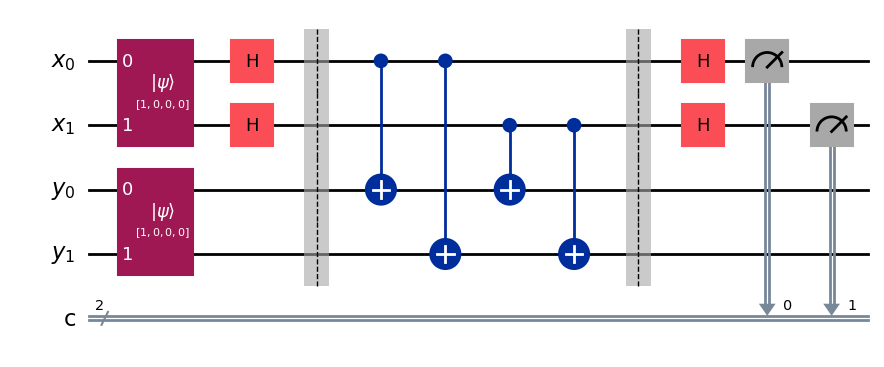

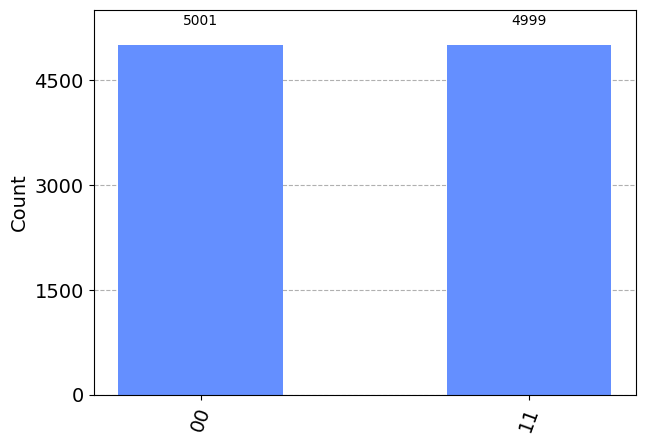

In [ ]:
import qiskit as qk
qrx = qk.QuantumRegister(2,'x')
crx = qk.ClassicalRegister(2,'c')
qry = qk.QuantumRegister(2,'y')

qc = qk.QuantumCircuit(qrx,qry,crx)

qc.initialize([1,0,0,0],qrx)
qc.initialize([1,0,0,0],qry)
qc.h([0,1])

qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.cx(1,2)
qc.cx(1,3)
qc.barrier()

qc.h([0,1])
qc.measure([0,1],[0,1])

display(qc.draw('mpl'))
histograma(qc)

We measure 50% of the time $|00\rangle$ and 50% of the time $|11\rangle$. But interestingly enough we never measure $|01\rangle$ or $|10\rangle$! What's going on here?

###### **Example with $n=2$ and $c=11$: Quantum Circuit with States in Superposition as Input, Output via Matrices and Dirac's Notation**

Let's work through the algebra of this circuit using Dirac's notation and confirm the results using numpy operations. The qubits are initialized in the state $|0\rangle$. Therefore we have $|\psi_0\rangle = |y_1y_0\;x_1x_0\rangle = |00\;00\rangle$.

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
x1x0 = np.kron(x1,x0)

y0 = np.array([[1,0]]).T
y1 = np.array([[1,0]]).T
y1y0 = np.kron(y1,y0)

psi0 = np.kron(y1y0,x1x0)
psi0.T

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

The first two Hadamard's gates put the qubits $x_1$ and $x_0$ in superposition. Qubits $y_1$ and $y_0$ are left undisturbed in the state $|00\rangle$.  In Dirac's notation this is:

$$|\psi_0\rangle = |y_1y_0 \; x_1x_0\rangle$$

$$|\psi_1\rangle = |y_1y_0(Hx_1)(Hx_0)\rangle$$

$$|\psi_1\rangle = |00\rangle \otimes \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right) \otimes \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)$$

$$|\psi_1\rangle = |00\rangle \otimes \frac{1}{2} \left(|00\rangle + |01\rangle + |10\rangle + |11\rangle \right)$$.

$$|\psi_1\rangle = \frac{1}{2} \left(|00\;00\rangle + |00\;01\rangle + |00\;10\rangle + |00\;11\rangle \right)$$.

$$|\psi_1\rangle = |00\rangle \otimes \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$

In [ ]:
H = np.array([[1,1],[1,-1]],dtype='int')
H2 = np.kron(H,H)
I2 = np.eye(4)
I2H2 = np.kron(I2,H2)
psi1 = I2H2.dot(psi0)/(np.sqrt(2)*np.sqrt(2))
I2H2.dot(psi0).T

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Now the four qubits in state $|\psi_1\rangle$ reach the first CNOT gate inside the oracle. This gate is applied between qubits $x_0$ (master) and $y_0$ (slave). This means that whenever $x_0$ is $0$, $y_0$ remains the same. And when $x_0$ is $1$, $y_0$ is inverted. The new superposition state is:

$$|\psi_1\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_1\rangle = \frac{1}{2} \left(|00\;00\rangle + |00\;01\rangle + |00\;10\rangle + |00\;11\rangle \right)$$.

$$|\psi_2\rangle = \frac{1}{2} \left(|00\;00\rangle + |01\;01\rangle + |00\;10\rangle + |01\;11\rangle \right)$$.


In [ ]:
Tf1_2 = np.eye(16)
Tf1_2 = Tf1_2[:,[0,5,2,7,4,1,6,3,8,9,10,11,12,13,14,15]]
psi2 = Tf1_2.dot(psi1); psi2.T*2

array([[1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Then comes the second CNOT, between $x_0$ (master) and $y_1$ (slave). The new superposition is:

$$|\psi_2\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_2\rangle = \frac{1}{2} \left(|00\;00\rangle + |01\;01\rangle + |00\;10\rangle + |01\;11\rangle \right)$$.

$$|\psi_3\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |00\;10\rangle + |11\;11\rangle \right)$$.



In [ ]:
Tf2_3 = np.eye(16)
Tf2_3 = Tf2_3[:,[0,1,2,3,4,13,6,15,8,9,10,11,12,5,14,7]]
psi3 = Tf2_3.dot(psi2); psi3.T*2

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]])

Now comes the third CNOT, between $x_1$ (master) and $y_0$ (slave). The new superposition is:

$$|\psi_3\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_3\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |00\;10\rangle + |11\;11\rangle \right)$$.

$$|\psi_4\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |01\;10\rangle + |10\;11\rangle \right)$$.




In [ ]:
Tf3_4 = np.eye(16)
Tf3_4 = Tf3_4[:,[0,1,6,3,4,5,2,7,8,9,10,15,12,13,14,11]]
psi4 = Tf3_4.dot(psi3); psi4.T*2

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.]])

The last (fourth) CNOT, is between $x_1$ (master) and $y_1$ (slave). The new superposition is:

$$|\psi_4\rangle = |y_1y_0\;x_1x_0\rangle$$

$$|\psi_4\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |01\;10\rangle + |10\;11\rangle \right)$$.

$$|\psi_5\rangle = \frac{1}{2} \left(|00\;00\rangle + |11\;01\rangle + |11\;10\rangle + |00\;11\rangle \right)$$.

$$|\psi_5\rangle = \frac{1}{\sqrt{2}} |00\rangle. \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right) + \frac{1}{\sqrt{2}}|11\rangle \frac{1}{\sqrt{2}} \left(|01\rangle + |10\rangle \right) $$.


In [ ]:
Tf4_5 = np.eye(16)
Tf4_5 = Tf4_5[:,[0,1,2,11,4,5,14,7,8,9,10,3,12,13,6,15]]
psi5 = Tf4_5.dot(psi4); psi5.T*2

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

The qubits have left the oracle in state $|\psi_5\rangle = |y_1y_0x_1x_0\rangle$. We now want to pass qubits $|x_1\rangle$ and $|x_0\rangle$ each through a Hadamard gate. Qubits $|y_1y_0\rangle$ should be left undisturbed.

From a matrix standpoint the transformation that will take us from $|\psi_5\rangle$ to $|\psi_6\rangle$ is $|\psi_6\rangle = I \otimes H^{\otimes 2}.|\psi_5\rangle$.

In [ ]:
I2 = np.eye(4)
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
I2H2 = np.kron(I2,H2)
psi6 = I2H2.dot(psi5)
print(psi6.T*2)

[[ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. -1.]]


Therefore $|\psi_6\rangle = \frac{1}{2}[|00\;00\rangle + |00\;11\rangle + |11\;00\rangle - |11\;11\rangle]$. Qubits $x_0$ and $x_1$ when measured will give as result either $|00\rangle$ or $11\rangle$. This confirms the results we got through Qiskit.

Now let's go in detail the transformation above. You start with $|\psi_5\rangle$ and multiply it by the matrix $I \otimes H{^{\otimes 2}}$. Setting aside the term $\frac{1}{2}$, the coeficients for the matrix $I \otimes H^{\otimes 2}$ can be calculated in Python as:

In [ ]:
import numpy as np
I2 = np.eye(4, dtype='int');
H2 = np.array([[1, 1, 1, 1],
               [1,-1, 1,-1],
               [1, 1,-1,-1],
               [1,-1,-1, 1]])/2;
I2H2 = np.kron(I2,H2);
print(I2H2*2)

[[ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  1. -1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 1.  1. -1. -1.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.]
 [ 1. -1. -1.  1.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -0.  0. -0.  1. -1.  1. -1.  0. -0.  0. -0.  0. -0.  0. -0.]
 [ 0.  0. -0. -0.  1.  1. -1. -1.  0.  0. -0. -0.  0.  0. -0. -0.]
 [ 0. -0. -0.  0.  1. -1. -1.  1.  0. -0. -0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  1. -1.  1. -1.  0. -0.  0. -0.]
 [ 0.  0. -0. -0.  0.  0. -0. -0.  1.  1. -1. -1.  0.  0. -0. -0.]
 [ 0. -0. -0.  0.  0. -0. -0.  0.  1. -1. -1.  1.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  1. -1.  1. -1.]
 [ 0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  1.  1. -1. 

Ignoring multiplications by 0 (but not ignoring multiplications that add up to 0), each line of the resulting state $|\psi_6\rangle$ is calculated as follows:

$+|00\;00\rangle \langle 00\;00|00\;00\rangle + |00\;00\rangle \langle 00\;11 | 00\;11 \rangle = |00\;00\rangle.(-1)^{\langle 00\;00 \oplus 00\;00 \rangle} \;\; + |00\;00\rangle.(-1)^{\langle 00\;00 \oplus 00\;11 \rangle} = +2|00\;00\rangle$

$+|00\;01\rangle \langle 00\;00|00\;00\rangle - |00\;01\rangle \langle 00\;11 | 00\;11 \rangle = |00\;01\rangle.(-1)^{\langle 00\;01 \oplus 00\;00 \rangle} \;\; + |00\;01\rangle.(-1)^{\langle 00\;01 \oplus 00\;11 \rangle} = +0|00\;01\rangle$

$+|00\;10\rangle \langle 00\;00|00\;00\rangle - |00\;10\rangle \langle 00\;11 | 00\;11 \rangle = |00\;10\rangle.(-1)^{\langle 00\;10 \oplus 00\;00 \rangle} \;\; + |00\;10\rangle.(-1)^{\langle 00\;10 \oplus 00\;11 \rangle} = +0|00\;10\rangle$

$+|00\;11\rangle \langle 00\;00|00\;00\rangle + |00\;11\rangle \langle 00\;11 | 00\;11 \rangle = |00\;11\rangle.(-1)^{\langle 00\;11 \oplus 00\;00 \rangle} \;\; + |00\;11\rangle.(-1)^{\langle 00\;11 \oplus 00\;11 \rangle} = +2|00\;00\rangle$

$------------------------------------$

$+|11\;00\rangle \langle 11\;01|11\;01\rangle + |11\;00\rangle \langle 11\;10 | 11\;10 \rangle = |11\;00\rangle.(-1)^{\langle 11\;00 \oplus 11\;01 \rangle} \;\; + |11\;00\rangle.(-1)^{\langle 11\;00 \oplus 11\;10 \rangle} = +2|11\;00\rangle$

$+|11\;01\rangle \langle 11\;01|11\;01\rangle - |11\;01\rangle \langle 11\;10 | 11\;10 \rangle = |11\;01\rangle.(-1)^{\langle 11\;01 \oplus 11\;01 \rangle} \;\; + |11\;01\rangle.(-1)^{\langle 11\;01 \oplus 11\;10 \rangle} = +0|11\;01\rangle$

$+|11\;10\rangle \langle 11\;01|11\;01\rangle - |11\;10\rangle \langle 11\;10 | 11\;10 \rangle = |11\;10\rangle.(-1)^{\langle 11\;10 \oplus 11\;01 \rangle} \;\; + |11\;10\rangle.(-1)^{\langle 11\;10 \oplus 11\;10 \rangle} = +0|11\;10\rangle$

$-|11\;11\rangle \langle 11\;01|11\;01\rangle - |11\;11\rangle \langle 11\;10 | 11\;10 \rangle = |11\;11\rangle.(-1)^{\langle 11\;11 \oplus 11\;01 \rangle} \;\; + |11\;11\rangle.(-1)^{\langle 11\;11 \oplus 11\;10 \rangle} = -2|11\;11\rangle$

Upon inspection, it is possible to verify that $|\psi_6\rangle$ expression above can be calculated by: $|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} |f(x),z\rangle$.

$x$ and $z$ are $n$ digits binary numbers. In this example $n=2$. Therefore each summation goes from $00$ to $11$.

$\langle x,z \rangle$ is a bitwise inner product between $x$ and $z$. Instead of multiplications we do a bitwise AND operation. After that, instead of adding the multiplication results we XOR the resulting bits.

By definition $f(x) = f(x \oplus c)$. Therefore $|\psi_6\rangle$ can also be calculated as $|\psi_6\rangle = \sum_x \sum_z (-1)^{\langle x \oplus c, z\rangle}|f(x \oplus c),z\rangle$

This means that

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} |f(x),z\rangle + \sum_x \sum_z (-1)^{\langle x \oplus c, z\rangle} \; |f(x \oplus c),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} |f(x),z\rangle + \sum_x \sum_z (-1)^{\langle x \oplus c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} + (-1)^{\langle x \oplus c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} + (-1)^{\langle x,z \rangle \oplus \langle c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} + (-1)^{\langle x,z \rangle \oplus \langle c, z\rangle} \; |f(x),z\rangle$$

$$2|\psi_6\rangle = \sum_{x} \sum_{z} (-1)^{\langle x,z \rangle} [ 1 + (-1)^{ \langle c, z\rangle}] \; |f(x),z\rangle$$


Now the coefficient of $|f(x),z\rangle$ will not be zero only when $\langle c, z \rangle = 0$. This means that the only states that will be observed are those that make $\langle c,z \rangle = 0$.

In this example $\langle 00,c \rangle = 0$ and $\langle 11,c \rangle = 0$. This means that $1.c_1 \oplus 1.c_0 = c_1 \oplus c_0 = 0$. This means that $c_1 = c_0$.

If $c_1=c_0=0$ the function doesn't have a pattern. Therefore $c_1=c_0=1$ because $\langle 11,11 \rangle = 0$.

We conclude that $c=11$

###### **Example with $n=3$ and $c=101$. Step by step procedure using matrices and Dirac notation**

Let's work through all the steps of an example with $n=3$ and $c=101$.

$000 \oplus 101 = 101$ hence, $f(000) = f(101) = 000$

$001 \oplus 101 = 100$ hence, $f(001) = f(100) = 001$

$010 \oplus 101 = 111$ hence, $f(010) = f(111) = 010$

$011 \oplus 101 = 110$ hence, $f(011) = f(110) = 011$

$100 \oplus 101 = 001$ hence, $f(100) = f(001) = 001$

$101 \oplus 101 = 000$ hence, $f(101) = f(000) = 000$

$110 \oplus 101 = 011$ hence, $f(110) = f(011) = 011$

$111 \oplus 101 = 010$ hence, $f(111) = f(010) = 010$


The algebraic steps are presented below.

First let's create qubits $x_0$, $x_1$ and $x_2$.

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
x2 = np.array([[1,0]]).T
x2x1x0 = np.kron(x2,np.kron(x1,x0))
x2x1x0.T

array([[1, 0, 0, 0, 0, 0, 0, 0]])

And qubits $y_0$, $y_1$ and $y_2$

In [ ]:
y0 = np.array([[1,0]]).T
y1 = np.array([[1,0]]).T
y2 = np.array([[1,0]]).T
y2y1y0 = np.kron(y2,np.kron(y1,y0))
y2y1y0.T

array([[1, 0, 0, 0, 0, 0, 0, 0]])

After that we initialize the circuit with qubits $y_2$, $y_1$, $y_0$, $x_2$, $x_1$ and $x_0$ each of them in state $|0\rangle$.

In [ ]:
psi0 = np.kron(y2y1y0,x2x1x0)
psi0.T

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Now let's put qubits $x$ in superposition and leave qubits $y$ undisturbed.

In [ ]:
I3 = np.eye(2**3)
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H3 = np.kron(H,H2)
I3H3 = np.kron(I3,H3)
psi1 = I3H3.dot(psi0)
psi1.T.round(2)

array([[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

Let's create the oracle. Mappings are $|0,x\rangle \rightarrow |f(x),x\rangle$

$f(000) = 000$ this means $|000\;000\rangle \rightarrow |000\;000\rangle$ on a decimal basis $|0\rangle \rightarrow |0\rangle$

$f(001) = 001$ this means $|000\;001\rangle \rightarrow |001\;001\rangle$ on a decimal basis $|1\rangle \rightarrow |9\rangle$

$f(010) = 010$ this means $|000\;010\rangle \rightarrow |010\;010\rangle$ on a decimal basis $|2\rangle \rightarrow |18\rangle$

$f(011) = 011$ this means $|000\;011\rangle \rightarrow |011\;011\rangle$ on a decimal basis $|3\rangle \rightarrow |27\rangle$

$f(100) = 001$ this means $|000\;100\rangle \rightarrow |001\;100\rangle$ on a decimal basis $|4\rangle \rightarrow |12\rangle$

$f(101) = 000$ this means $|000\;101\rangle \rightarrow |000\;101\rangle$ on a decimal basis $|5\rangle \rightarrow |5\rangle$

$f(110) = 011$ this means $|000\;110\rangle \rightarrow |011\;110\rangle$ on a decimal basis $|6\rangle \rightarrow |30\rangle$

$f(111) = 010$ this means $|000\;111\rangle \rightarrow |010\;111\rangle$ on a decimal basis $|7\rangle \rightarrow |23\rangle$


OBS: Note that a quantum "function" or "oracle" is in fact a scramble of state positions (see below):

In [ ]:
n = 2*3 # 2 números de 3 digitos cada
Uf = np.eye(2**n) # 2^6 = 64 posições
Uf = Uf[:,[ 0, 9,18,27,12, 5,30,23,
            8, 1,10,11, 4,13,14,15,
           16,17, 2,19,20,21,22, 7,
           24,25,26, 3,28,29, 6,31,
           32,33,34,35,36,37,38,39,
           40,41,42,43,44,45,46,47,
           48,49,50,51,52,53,54,55,
           56,57,58,59,60,61,62,63]]

In [ ]:
psi5 = Uf.dot(psi1)
psi5.T.round(2)

array([[0.35, 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.  , 0.35, 0.  ,
        0.  , 0.35, 0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.  ,
        0.  , 0.35, 0.  , 0.  , 0.  , 0.35, 0.  , 0.  , 0.35, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

And after that let's pass qubits $x$ again by Hadamard gates, leaving qubits $y$ undisturbed.

In [ ]:
psi6 = I3H3.dot(psi5)
psi6.T

array([[ 0.25,  0.  ,  0.25,  0.  ,  0.  ,  0.25,  0.  ,  0.25,  0.25,
         0.  ,  0.25,  0.  ,  0.  , -0.25,  0.  , -0.25,  0.25,  0.  ,
        -0.25,  0.  ,  0.  ,  0.25,  0.  , -0.25,  0.25,  0.  , -0.25,
         0.  ,  0.  , -0.25,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ]])

Let's use `numpy` to quickly get `psi6`'s rows that are non-zero.

In [ ]:
np.where(psi6 > 0)[0]

array([ 0,  2,  5,  7,  8, 10, 16, 21, 24, 31])

To get rows number in binary we can use:

In [ ]:
[format(i,'#08b')[2:] for i in np.where(psi6 > 0)[0]]

['000000',
 '000010',
 '000101',
 '000111',
 '001000',
 '001010',
 '010000',
 '010101',
 '011000',
 '011111']

If we measure qubits $x_2$, $x_1$ and $x_0$ the only states that we will see are: $|000\rangle$, $|010\rangle$, $|101\rangle$ and $|111\rangle$.

Therefore to get to know $c$ we solve:

$\langle 010,c \rangle = 0$

$\langle 101,c \rangle = 0$

$\langle 111,c \rangle = 0$

We then get:
From the first equation: $0 \oplus c_1 \oplus 0 = 0$. This means $c_1 = 0$

From the second equation: $c_2 \oplus 0 \oplus c_0 = 0$. This means c_2 = c_0$

From the third equation: $c_2 \oplus c_1 \oplus c_0 = 0$. This means $c_0 \oplus 1 \oplus c_0 = 0$. Therefore $c_0 = c_2 = 1$

We conclude that $c=101$

###### **A detour: general procedure to implement logic operations with quantum circuits**

Now let's solve this problem using a quantum circuit. Our objective is to create a general structure that will allow us to do a mapping of the kind: $\{0,1\}^n \rightarrow \{0,1\}^m$ where $n \leq m$.

First thing to remember is that Quantum Computation is reversible. Therefore even if we are only interested in a smaller number of bits in the output, our mapping must be of kind $\{0,1\}^n \rightarrow \{0,1\}^n$. In fact our mapping will be like $|0,0,x\rangle \rightarrow |f(x),0,x\rangle$

For reasons that will became clearer as we implement more circuits, the general structure will be this:

1. Start with three groups of qubits: $|0,0,x\rangle$.
2. Calculate $f(x)$ and store its value in the middle qubit getting $|0,f(x),x\rangle$.
3. Copy **classicaly** value in qubit $f(x)$ to qubit $0$ getting $|f(x),f(x),x\rangle$.
4. Reverse $f(x)$ calculation getting back to $0$ in the middle qubit, obtaining as final result $|f(x),0,x\rangle$

###### **A detour: quantum version of the NAND gate**

When dealing with classical computing, the NAND gate is universal, let's implement a quantum version of it. To do this we need a quantum version of the NOT and AND gates.

The quantum version of the classical NOT is the X gate. The X gate creates a mapping of the kind: $|1\rangle = X|0\rangle$ and $|0\rangle = X|1\rangle$. It is represented by matrix $ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $

The quantum version of the AND gate is more difficult. This happens because it is a non reversible operation since it has two inputs and one output. We will obtain an equivalent reversible result using a three bits input output gate called Controlled-Controlled-Not gate. This gate is also known as Toffoli gate.

A Toffoli gate is a circuit with three inputs, two masters and one slave. If both masters are in state $|1\rangle$ then the slave is reversed. The truth table of this gate is presented below. In this table $x$ and $y$ are masters and $z$ is slave.

$$\begin{array}{ccc|ccc}
z & y & x & u & y & x \\
\hline
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 \\
\hdashline
1 & 0 & 0 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 \\
1 & 1 & 1 & 0 & 1 & 1 \\
\end{array}$$

Now suppose $z = 0$. The truth table becomes:

$$\begin{array}{ccc|ccc}
z & y & x & u & y & x \\
\hline
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\hdashline
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 \\
\end{array}$$

Under these circunstances, $u = x \wedge y$.

To be sure this operation can be implemented in a quantum computer let's confirm that CCNOT is its own inverse. If it is then $CCNOT.CNOT = I$.

In [ ]:
import numpy as np
CCNOT = np.eye(8)
CCNOT = CCNOT[:,[0,1,2,7,4,5,6,3]]
CCNOT.dot(CCNOT)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

So we have created a transformation $|0,y,x\rangle \rightarrow |x \wedge y,y, x$. Let's implement it using Qiskit (see below).


In [ ]:
import qiskit as qk

def qNAND(y0,x0):
  x = qk.QuantumRegister(1,"x")
  y = qk.QuantumRegister(1,"y")
  z = qk.QuantumRegister(1,"z")
  u = qk.QuantumRegister(1,"u")
  c = qk.ClassicalRegister(3,'c')
  qc = qk.QuantumCircuit(x,y,z,u,c)

  # Put qubits u and z in state |0>
  qc.initialize([1,0],z)
  qc.initialize([1,0],u)
  qc.initialize(y0,y)
  qc.initialize(x0,x)

  # Perform computation
  qc.barrier()
  qc.ccx(x,y,z)
  qc.x(z)
  # Copy CLASSICALY state of z to u
  qc.cx(z,u)
  qc.barrier()

  # Reverse computation
  qc.x(z)
  qc.ccx(x,y,z)
  qc.barrier()

  # Measure results
  qc.measure(x,c[0])
  qc.measure(y,c[1])
  qc.measure(u,c[2])
  display(qc.draw('mpl'))

  simulator = qk_aer.Aer.get_backend("aer_simulator")
  results = simulator.run(qk.transpile(qc,simulator), shots=10000).result().get_counts()
  grafico = qk.visualization.plot_histogram(results)
  return(grafico)

0 NAND 0 = 1


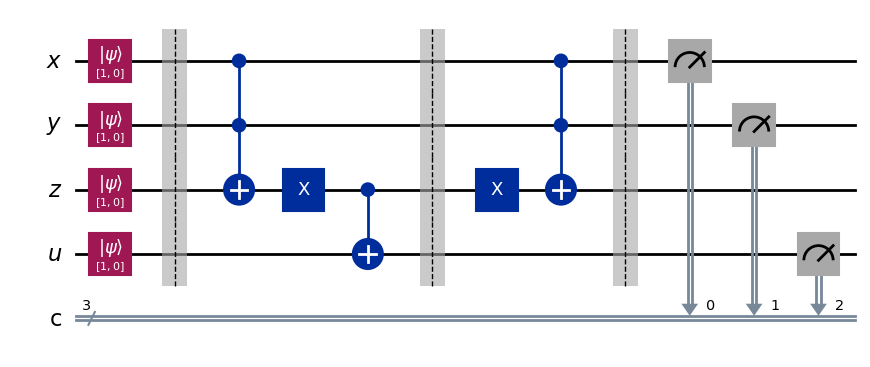

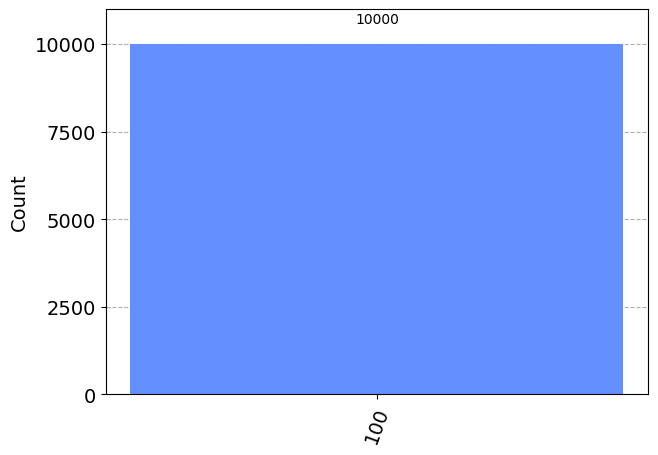

In [ ]:
print("0 NAND 0 = 1")
qNAND([1,0],[1,0])

0 NAND 1 = 1


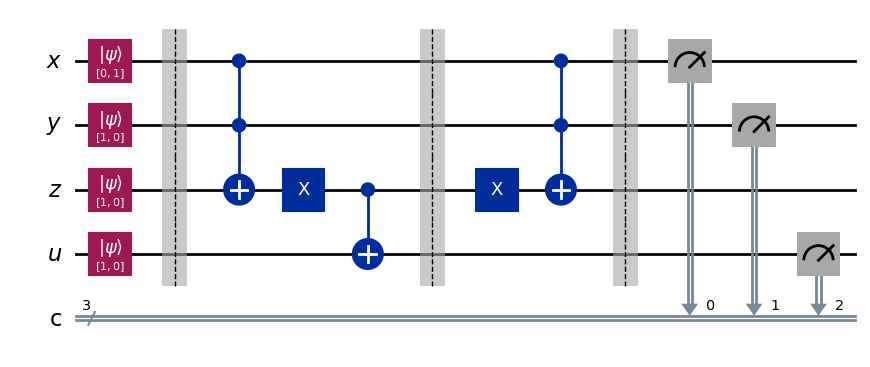

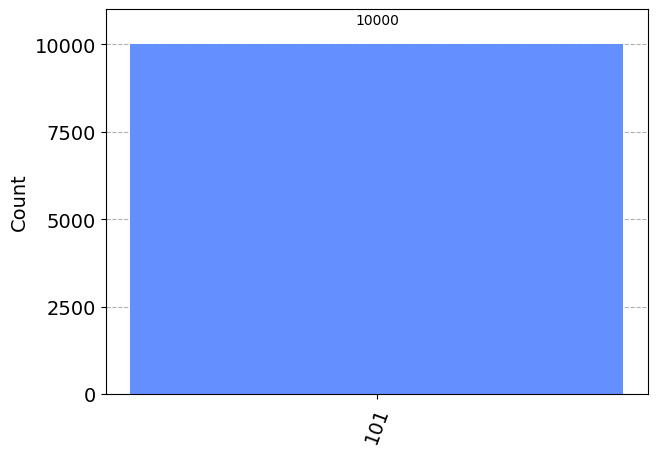

In [ ]:
print("0 NAND 1 = 1")
qNAND([1,0],[0,1])

1 NAND 0 = 1


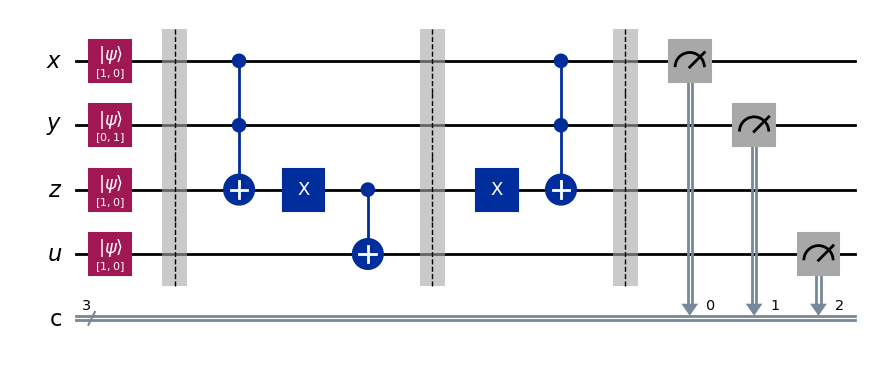

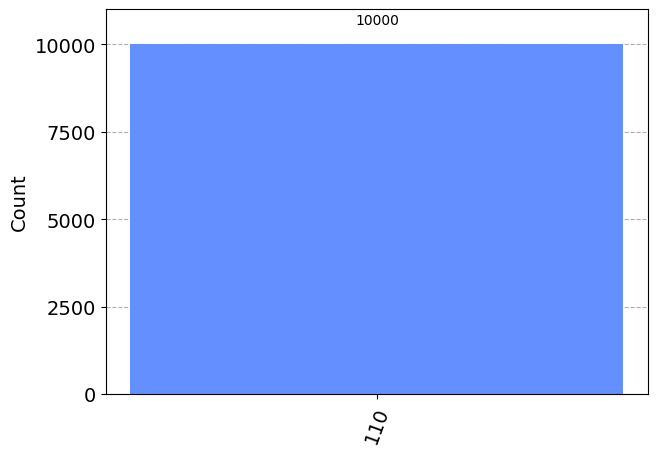

In [ ]:
print("1 NAND 0 = 1")
qNAND([0,1],[1,0])

1 NAND 1 = 0


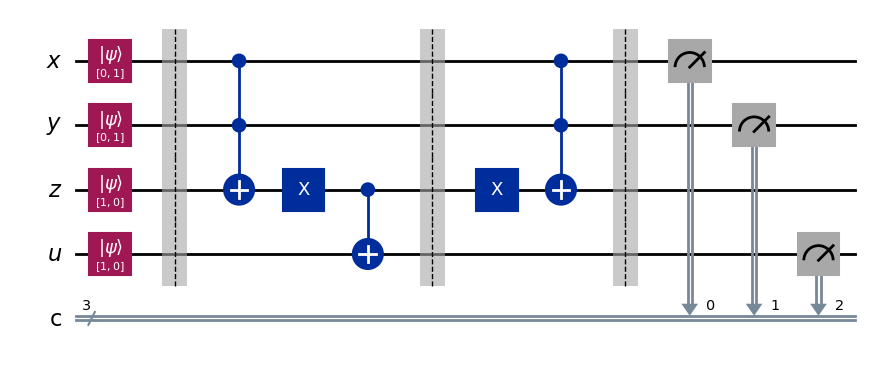

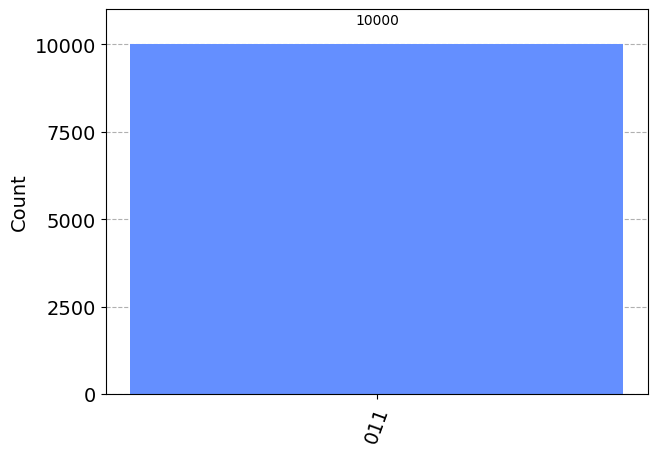

In [ ]:
print("1 NAND 1 = 0")
qNAND([0,1],[0,1])

###### **A detour: quantum version of the OR gate**

As an exercise, let's implement a quantum version of an OR gate. The truth table below allows $u$ to be $x \vee y$:

$$\begin{array}{ccc|ccc}
z & y & x & u & y & x \\
\hline
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 1 \\
\hdashline
0 & 1 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 \\
\end{array}$$

The operation in $u$ can be computed applying $X$ gates to $y$ and $x$ and using $y'$ and $x'$ as masters gates and $z$ as target in a Toffoli gate. After that, reverse $u$ with another $X$ gate. The Qiskit circuit below implements this operation

In [ ]:
import qiskit as qk

def qOR(y0,x0):
  x = qk.QuantumRegister(1,"x")
  y = qk.QuantumRegister(1,"y")
  z = qk.QuantumRegister(1,"z")
  u = qk.QuantumRegister(1,"u")
  c = qk.ClassicalRegister(3,'c')

  # Initialize qubits
  qc = qk.QuantumCircuit(x,y,z,u,c)
  qc.initialize(x0,x)
  qc.initialize(y0,y)
  qc.initialize([1,0],z)
  qc.initialize([1,0],u)

  # Compute function
  qc.barrier()
  qc.x(x)
  qc.x(y)
  qc.ccx(x,y,z)
  qc.x(z)
  qc.cx(z,u)
  qc.barrier()

  # Reverse computation
  qc.x(z)
  qc.ccx(x,y,z)
  qc.x(y)
  qc.x(x)
  qc.barrier()

  # Measure results
  qc.measure(x,c[0])
  qc.measure(y,c[1])
  qc.measure(u,c[2])
  display(qc.draw('mpl'))

  # Simulate circuit
  simulator = qk_aer.Aer.get_backend('aer_simulator')
  results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
  grafico = qk.visualization.plot_histogram(results)
  return(grafico)

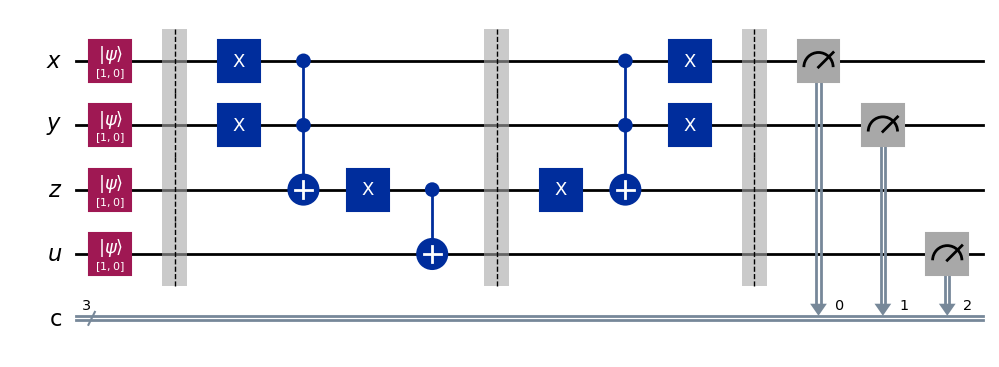

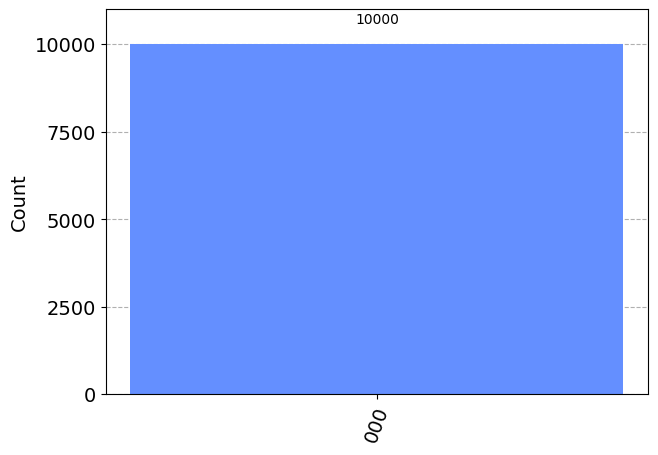

In [ ]:
qOR([1,0],[1,0])

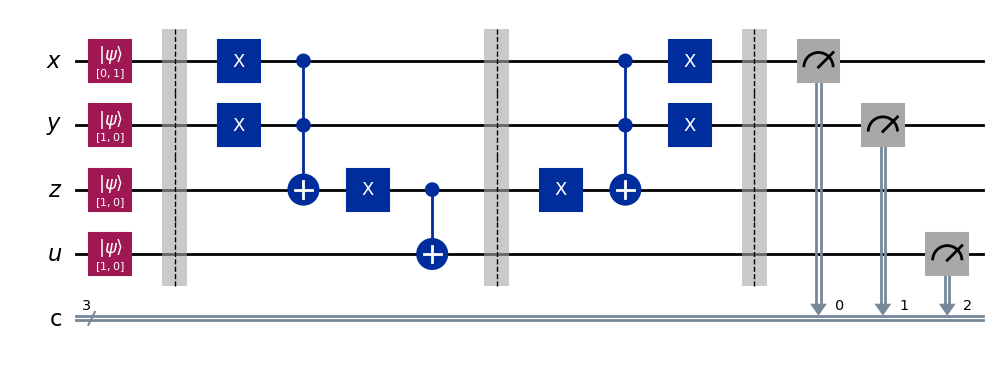

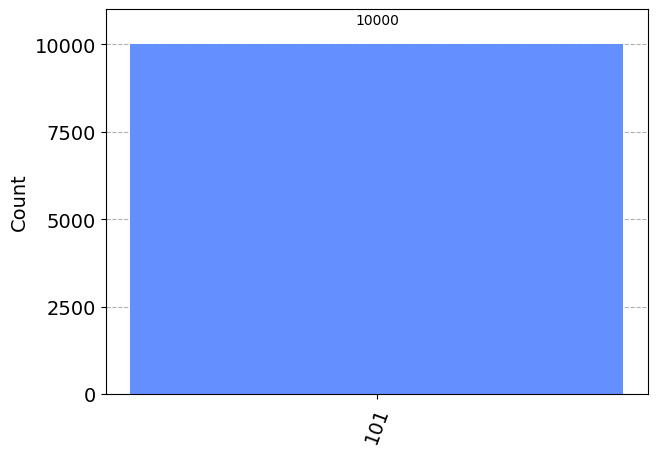

In [ ]:
qOR([1,0],[0,1])

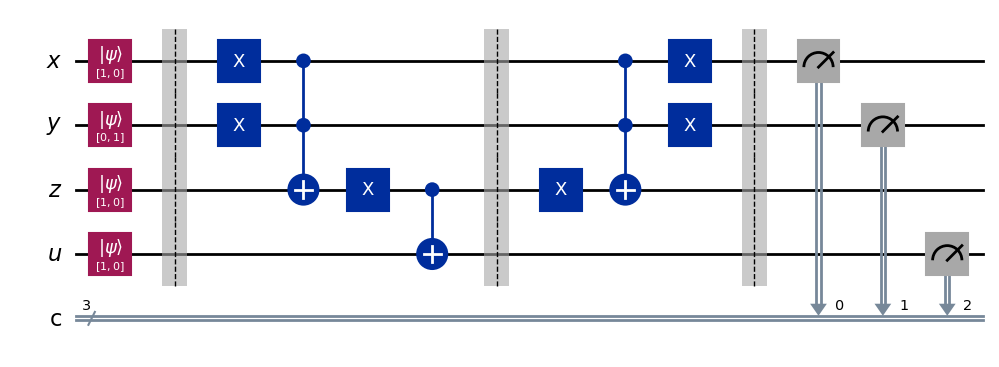

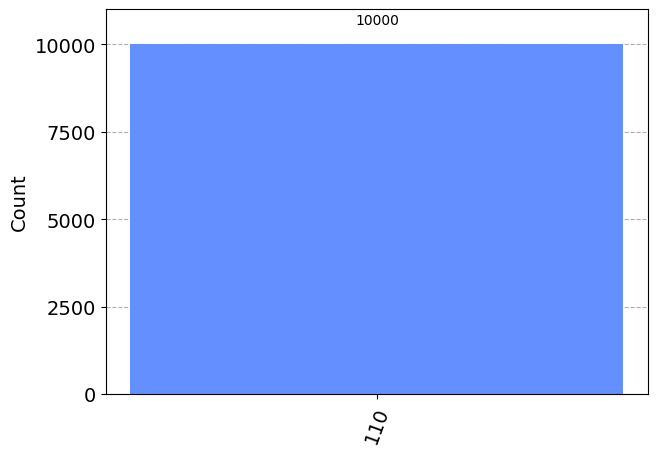

In [ ]:
qOR([0,1],[1,0])

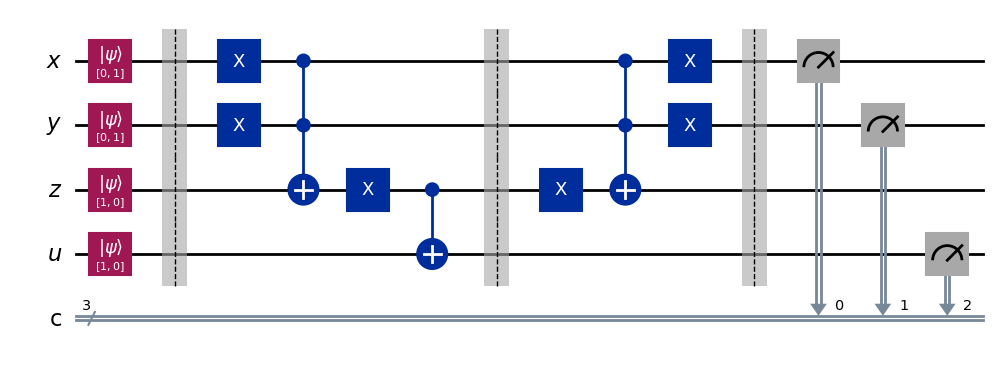

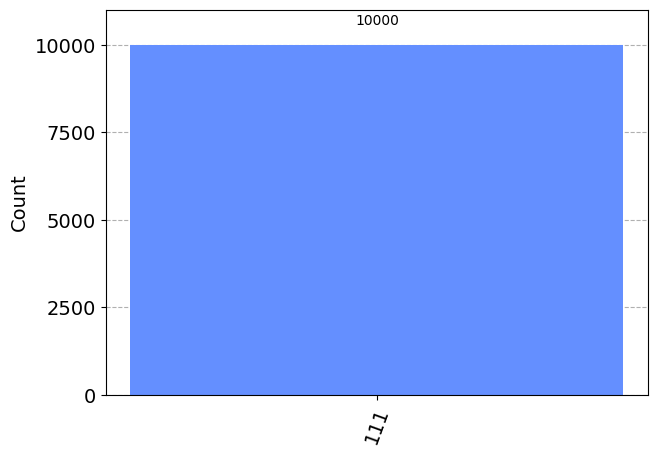

In [ ]:
qOR([0,1],[0,1])

###### **A detour: quantum version of the operation $(x \wedge y) \vee (x' \wedge y')$**

In [ ]:
import qiskit as qk

def qNXOR(y0,x0,calc=True,show=False):
  ##################################################
  # Create registers                               #
  ##################################################
  # Base registers
  x = qk.QuantumRegister(1,"x")
  y = qk.QuantumRegister(1,"y")

  # Auxiliary register (for x and y)
  z = qk.QuantumRegister(1,"z")

  # Auxiliary register (to store x AND y)
  a1 = qk.QuantumRegister(1,"a1")

  # Auxiliary register (to store NOT(x) AND NOT(y))
  a2 = qk.QuantumRegister(1,"a2")

  # Auxiliary register (for a1 and a2)
  b1 = qk.QuantumRegister(1,"b1")

  # Auxiliary register (to store a1 OR a2)
  b2 = qk.QuantumRegister(1,"b2")

  # Classical Registers to store x,y and final measurement
  c = qk.ClassicalRegister(3,"c")
  ##################################################
  # Create Circuit                                 #
  ##################################################
  qc = qk.QuantumCircuit(x,y,z,a1,a2,b1,b2,c)

  ##################################################
  # Initialize registers                           #
  ##################################################
  qc.initialize(x0,x)
  qc.initialize(y0,y)
  qc.initialize([1,0],z)
  qc.initialize([1,0],a1)
  qc.initialize([1,0],a2)
  qc.initialize([1,0],b1)
  qc.initialize([1,0],b2)

  ###################################################
  # Calculate x AND y. Copy result to a1. Reverse z #
  ###################################################
  qc.barrier()
  qc.ccx(x,y,z)
  qc.cx(z,a1)
  qc.ccx(x,y,z)
  qc.barrier()

  #########################################################
  # Calc. NOT(x) AND NOT(y). Copy result to a2. Reverse z #
  #########################################################
  qc.barrier()
  qc.x(x)
  qc.x(y)
  qc.ccx(x,y,z)
  qc.cx(z,a2)
  qc.ccx(x,y,z)
  qc.x(y)
  qc.x(x)
  qc.barrier()

  #################################################
  # Calc. a1 OR a2. Copy result to b2. Reverse b1 #
  #################################################
  qc.barrier()
  qc.x(a1)
  qc.x(a2)
  qc.ccx(a1,a2,b1)
  qc.x(b1)
  qc.cx(b1,b2)
  qc.x(b1)
  qc.ccx(a1,a2,b1)
  qc.barrier()

  #################################################
  # Measure b2                                    #
  #################################################
  qc.measure(x,c[0])
  qc.measure(y,c[1])
  qc.measure(b2,c[2])

  #################################################
  # Draw circuit                                  #
  #################################################
  if show:
    display(qc.draw("mpl"))

  #################################################
  # Run circuit. Collect results                  #
  #################################################
  if calc:
    simulator = qk_aer.Aer.get_backend("aer_simulator")
    results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
    grafico = qk.visualization.plot_histogram(results)
    return(grafico)
  else:
    return()


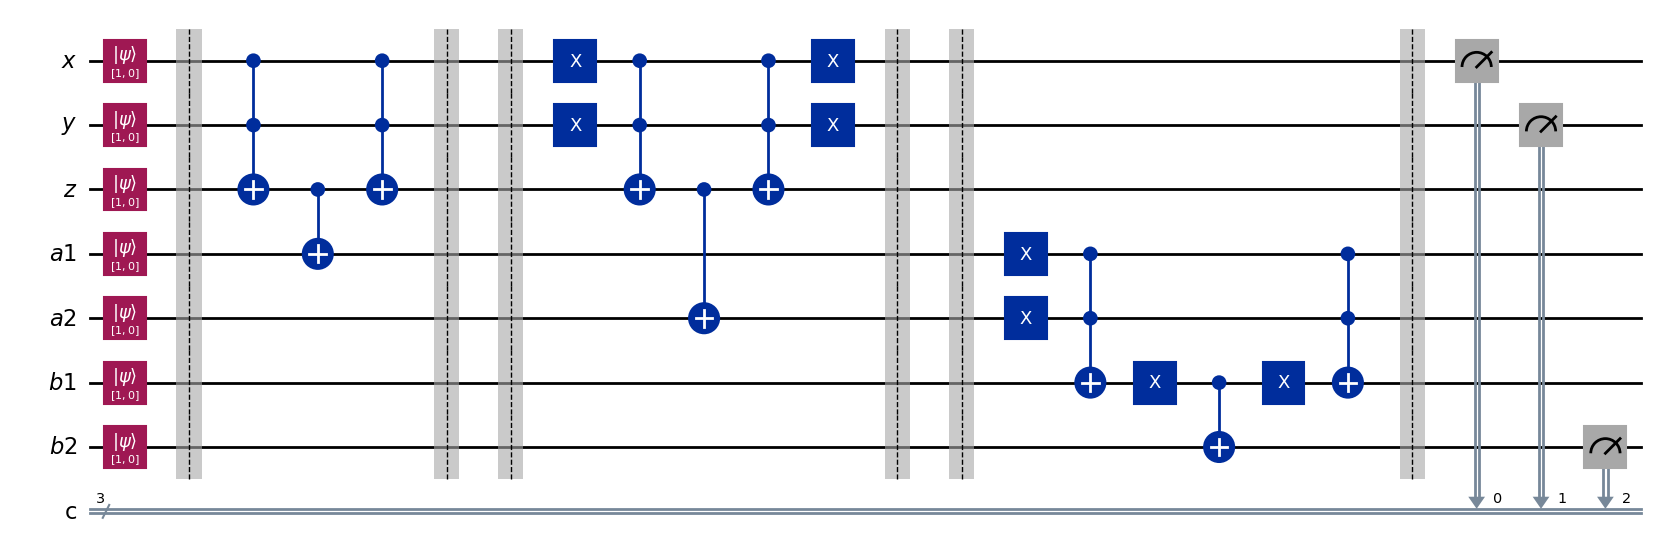

()

In [ ]:
qNXOR([1,0],[1,0],False,True)

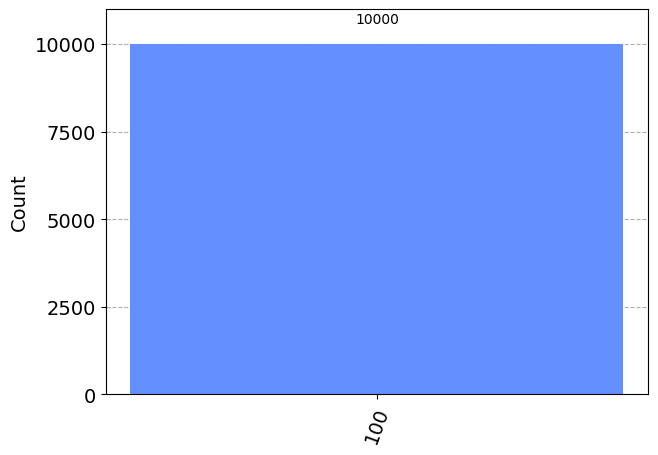

In [ ]:
qNXOR([1,0],[1,0])

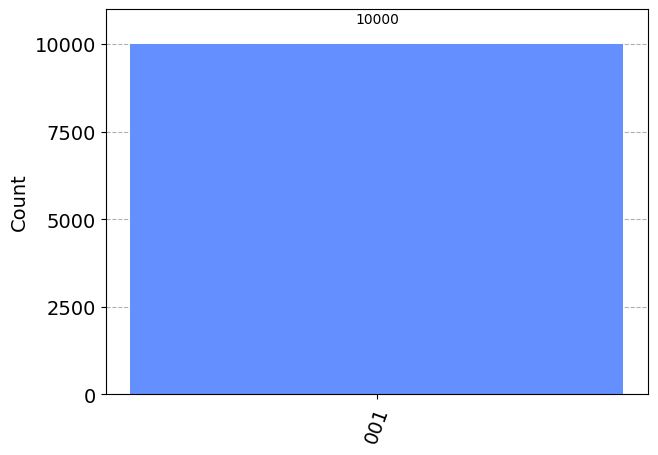

In [ ]:
qNXOR([1,0],[0,1])

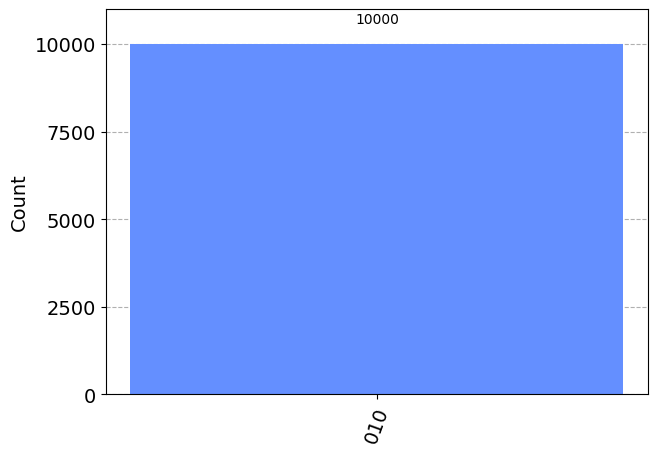

In [ ]:
qNXOR([0,1],[1,0])

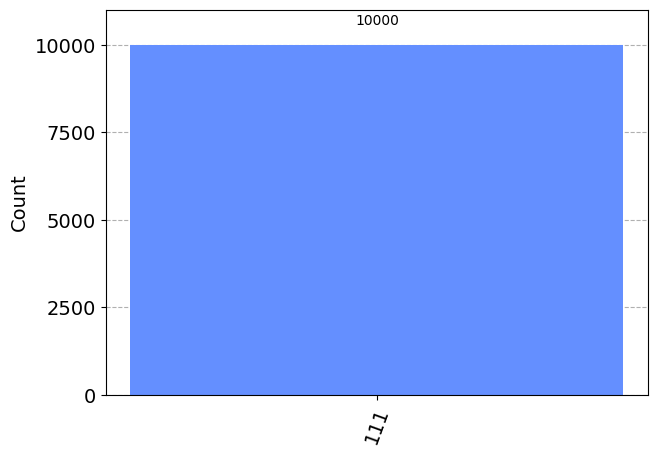

In [ ]:
qNXOR([0,1],[0,1])

###### **A detour: using superposition to get all results from $(x \wedge y) \vee (x' \wedge y')$ truth table**

If we put the qubits $x$ and $y$ in superposition and run the circuit, we get all four results from the truth table at once. From the states measured in the output we can infer that for $|y,x\rangle = |0,0\rangle$ the result is $|1\rangle$, for $|y,x\rangle = |0,1\rangle$ it is $|0\rangle$ and so on.  

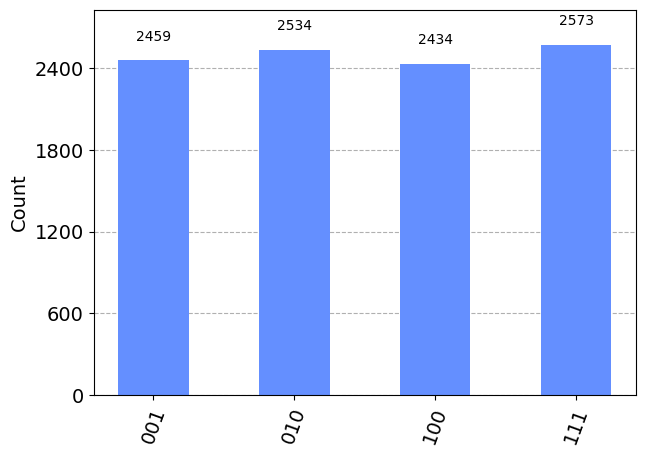

In [ ]:
x0 = np.array([1,1])/np.sqrt(2)
y0 = np.array([1,1])/np.sqrt(2)
qNXOR(y0,x0)

###### **Example with $n=3$ and $c=101$. Step by step procedure using quantum circuits**

Now we return to the main section subject. Let's create the oracle and circuit using Qiskit's resources. Mappings are shown below.

$f(000) = 000$ this means $|000\;000\rangle \rightarrow |000\;000\rangle$ or $|0\rangle \rightarrow |0\rangle$

$f(001) = 001$ this means $|000\;001\rangle \rightarrow |001\;001\rangle$ or $|1\rangle \rightarrow |9\rangle$

$f(010) = 010$ this means $|000\;010\rangle \rightarrow |010\;010\rangle$ or $|2\rangle \rightarrow |18\rangle$

$f(011) = 011$ this means $|000\;011\rangle \rightarrow |011\;011\rangle$ or $|3\rangle \rightarrow |27\rangle$

$f(100) = 001$ this means $|000\;100\rangle \rightarrow |001\;100\rangle$ or $|4\rangle \rightarrow |12\rangle$

$f(101) = 000$ this means $|000\;101\rangle \rightarrow |000\;101\rangle$ or $|5\rangle \rightarrow |5\rangle$

$f(110) = 011$ this means $|000\;110\rangle \rightarrow |011\;110\rangle$ or $|6\rangle \rightarrow |30\rangle$

$f(111) = 010$ this means $|000\;111\rangle \rightarrow |010\;111\rangle$ or $|7\rangle \rightarrow |23\rangle$


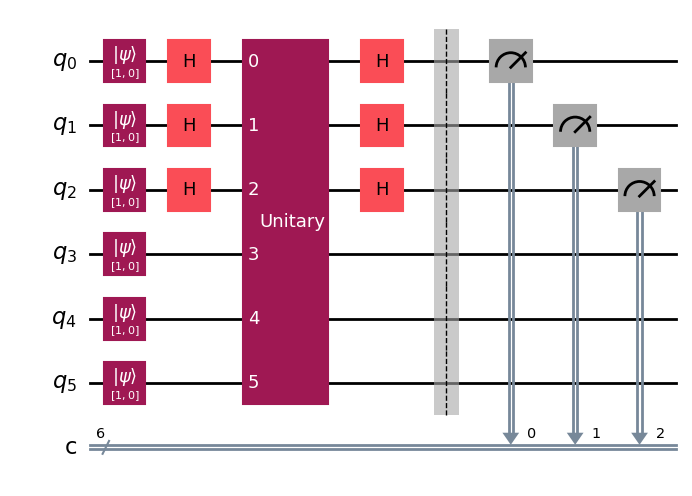

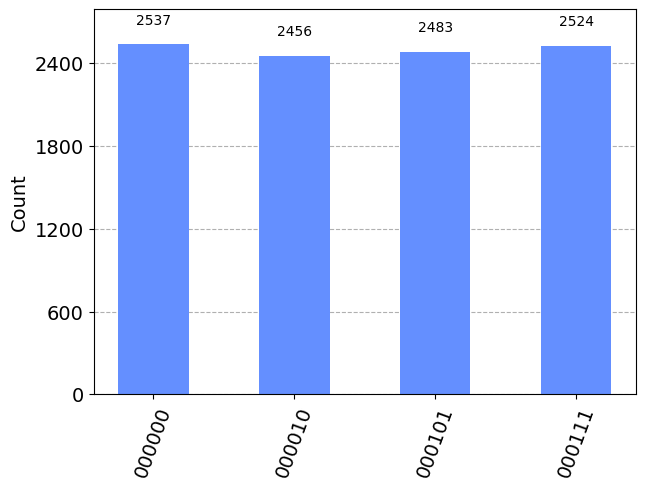

In [ ]:
import qiskit as qk
from qiskit.quantum_info.operators import Operator

qr = qk.QuantumRegister(6,"q")
cr = qk.ClassicalRegister(6,"c")
qc = qk.QuantumCircuit(qr,cr)

for i in range(6):
  qc.initialize([1,0],i)

for i in range(3):
  qc.h(i)

oracle = np.eye(2**6)
oracle[:,[ 0,  0]] = oracle[:,[  0, 0]]
oracle[:,[ 1,  9]] = oracle[:,[  9, 1]]
oracle[:,[ 2, 18]] = oracle[:,[ 18, 2]]
oracle[:,[ 3, 27]] = oracle[:,[ 27, 3]]
oracle[:,[ 4, 12]] = oracle[:,[ 12, 4]]
oracle[:,[ 5,  5]] = oracle[:,[  5, 5]]
oracle[:,[ 6, 30]] = oracle[:,[ 30, 6]]
oracle[:,[ 7, 23]] = oracle[:,[ 23, 7]]
oracle = Operator(oracle)

qc.append(oracle,qr)

for i in range(3):
  qc.h(i)

qc.barrier()

for i in range(3):
  qc.measure(i,i)

display(qc.draw("mpl"))

simulator = qk_aer.Aer.get_backend("aer_simulator")
results = simulator.run(qk.transpile(qc,simulator),shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

From the results measured above, the qubits $x_2x_1x_0$ states are: $000$, $010$, $101$ and $111$. From what we learned about Simon's algorithm we can discard $000$ because this would make the function non periodic (1 to 1).

From the other three results we create a system of equations:

$\langle 010 , c \rangle = 0$

$\langle 101 , c \rangle = 0$

$\langle 111 , c \rangle = 0$

Breaking the system into $c$'s digits $c_2$, $c_1$ and $c_0$ we get:

$0 \oplus c_1 \oplus 0 = 0 \rightarrow c_1 = 0$

$c_2 \oplus 0 \oplus c_0 = 0 \rightarrow c_2 = c_0$

$c_2 \oplus c_1 \oplus c_0 = 0 \rightarrow c_2 \oplus 0 \oplus c_0 = 0 \rightarrow c_0 \oplus 0 \oplus c_0 = 0 \rightarrow c_0 = 1$.

We conclude that $c=101$

##### **Grover's Algorithm**

###### **Introduction: The function to find $x_0$ where $f(x_0) = 1$**

Grover's algorithm is about a search in an unstructured list. In math terms we are given a function (the so called *oracle*) which in this case acts as follows: $f(x = x_0) = 1$ and $f(x \neq x_0) = 0$. From that we want to find $x_0$. If we are using a classical computer, we would have to search, on average $\frac{2^n}{2}$ terms to find $x_0$. Let's see what can be done with a quantum computer.

Suppose $n=2$ and $x_0 = 10$. Therefore the function is:

$$f(00) = 0$$
$$f(01) = 0$$
$$f(10) = 1$$
$$f(11) = 0$$

To represent this function as a qubits states transformation it must be unitary. In this example it will be a 3 qubits input output unitary transformation in which:

$$|x_2x_1x_0\rangle _{in} \rightarrow |x_2x_1x_0\rangle _{out}$$

$$|0.00\rangle \rightarrow |0.00\rangle$$

$$|0.01\rangle \rightarrow |0.01\rangle$$

$$|0.10\rangle \rightarrow |1.10\rangle$$

$$|0.11\rangle \rightarrow |0.11\rangle$$

$$|1.00\rangle \rightarrow |1.00\rangle$$

$$|1.01\rangle \rightarrow |1.01\rangle$$

$$|1.10\rangle \rightarrow |0.10\rangle$$

$$|1.11\rangle \rightarrow |1.11\rangle$$

In matrix format it becomes:

\begin{array}{c:cccccccc}
     & 0.00 & 0.01 & 0.10 & 0.11 & 1.00 & 1.01 & 1.10 & 1.11 \\
\hline
0.00 & 1    &      &      &      &      &      &      &      \\
0.01 &      & 1    &      &      &      &      &      &      \\
0.10 &      &      &      &      &      &      & 1    &      \\
0.11 &      &      &      & 1    &      &      &      &      \\
1.00 &      &      &      &      & 1    &      &      &      \\
1.01 &      &      &      &      &      & 1    &      &      \\
1.10 &      &      & 1    &      &      &      &      &      \\
1.11 &      &      &      &      &      &      &      & 1    \\
\end{array}

From a practical standpoint it is an identity matrix with columns 2 and 6 switched.

In [ ]:
import numpy as np
oracle = np.eye(8)
oracle[:,[2,6]] = oracle[:,[6,2]]
oracle

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

###### **Qubits $x_1$ and $x_0$ initialization**

To start the execution of Grover's algorithm, first we initialize $n$ qubits in $|0\rangle$ state. Call this state $|\psi_0\rangle$. Since in this example $n = 2$ we will initialize qubits $x_1x_0$ in $|0\rangle$. This will create state $|\psi_0\rangle = |00\rangle$.

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
psi0 = np.kron(x1,x0)

From state $|\psi_0\rangle$ we apply a Hadamard gate in both qubits and get state $|\psi_1\rangle = H^{\otimes 2}|\psi_0\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
psi1 = H2.dot(psi0)
psi1.T

array([[0.5, 0.5, 0.5, 0.5]])

###### **Phase Inversion**

Grover's algorithm requires two steps. First a phase inversion.  In this stage you start by getting a qubit $|y\rangle = |1\rangle$ and passing it through a Hadamard gate. This will create state $|\psi_{2a}\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$


In [ ]:
# Initialize a qubit y in state |1>
y  = np.array([[0,1]]).T

# Pass it through a Hadamard gate and obtain state psi2a
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
psi2a = H.dot(y)
psi2a.T

array([[ 0.707, -0.707]])

Now combine $|\psi_1\rangle$ with $|\psi_{2a}\rangle$ by tensor product them. This will create state:

$$|\psi_2\rangle = |\psi_{2a}\rangle \otimes |\psi_1\rangle$$

$$|\psi_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$

$$|\psi_2\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle - |100\rangle -|101\rangle -|110\rangle -|111\rangle)$$.



In [ ]:
psi2 = np.kron(psi2a,psi1)
psi2.T

array([[ 0.354,  0.354,  0.354,  0.354, -0.354, -0.354, -0.354, -0.354]])

Next, pass vector $|\psi_2\rangle$ through the Oracle. The Oracle implements the function that we want to find $x_0$ such that $f(x_0)=1$. As a quantum circuit it in fact is:

$$|\psi_2\rangle = |z_2,z_1z_0\rangle \rightarrow |\psi_3\rangle = |z_2 \oplus f(z_1z_0), z_1z_0\rangle$$

As described in the Introduction, in this example the function is: $f(00) = f(01) = f(11) = 0$ and $f(10) = 1$ which will be represented by matrix below. This matrix in practice is a switch between columns numbers $2 (010)$ and $6 (110)$.

$$\begin{array}{c:cccccccc}
     & 0.00 & 0.01 & 0.10 & 0.11 & 1.00 & 1.01 & 1.10 & 1.11 \\
 \hline
0.00 &    1 &      &      &      &      &      &      &      \\
0.01 &      &    1 &      &      &      &      &      &      \\
0.10 &      &      &      &      &      &      &    1 &      \\
0.11 &      &      &      &    1 &      &      &      &      \\
1.00 &      &      &      &      &    1 &      &      &      \\
1.01 &      &      &      &      &      &    1 &      &      \\
1.10 &      &      &    1 &      &      &      &      &      \\
1.11 &      &      &      &      &      &      &      &    1 \\
\end{array}$$

Using Dirac's notation:

$$|\psi_2\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle - |100\rangle -|101\rangle -|110\rangle -|111\rangle)$$.

$$|\psi_3\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle + |110\rangle + |011\rangle - |100\rangle -|101\rangle -|010\rangle -|111\rangle)$$

Rearranging the terms order:

$$|\psi_3\rangle = \frac{1}{2\sqrt{2}}(|000\rangle + |001\rangle - |010\rangle + |011\rangle - |100\rangle -|101\rangle +|110\rangle -|111\rangle)$$


In [ ]:
oracle = np.eye(8)
oracle[:,[2,6]] = oracle[:,[6,2]]
oracle

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
psi3 = oracle.dot(psi2)
psi3.T

array([[ 0.354,  0.354, -0.354,  0.354, -0.354, -0.354,  0.354, -0.354]])

The resulting state is $|\psi_3\rangle = \frac{1}{2\sqrt{2}} \left( |000 \rangle + |001 \rangle - |010 \rangle + |011 \rangle + |100 \rangle + |101 \rangle - |110 \rangle + |111 \rangle \right)$. If you look at it, you notice that the phase for the state that we are looking for ($|10\rangle$ in qubits $x_1$ and $x_0$) has a negative sign. This is why we call this operation phase inversion.

###### **A detour: Reversion About The Mean**

The second phase is called **reversion about the mean**. Let's explain it with another example. Suppose you have five numbers in a vector: ${v_0} =  [10, 20, -30, 40, 50 ]^T$. Their average is $\mu = 18$.

In [ ]:
v0 = np.array([[10,20,-30,40,50]]).T
mu = np.mean(v0)
v0.T, mu

(array([[ 10,  20, -30,  40,  50]]), 18.0)

Each number is at a distance from the average. These distances can be calculated as:

$$\Delta = {v_0} - \mu$$

$$\Delta = [10-18, 20-18,-30-18,40-18,50-18]^T$$

$$\Delta = [-8, 2, -48, 22, 32]^T$$

In [ ]:
D = v0 - mu
D.T

array([[ -8.,   2., -48.,  22.,  32.]])

Now let's start from the average and calculate the vector $v_1$. This vector's elements are the numbers that are in the opposite distance from the mean. Is expression is: $v_1 = \mu - \Delta$. Since $\Delta = v_0 - \mu$, $v_1$ is: $v_1 = \mu - (v_0 - \mu)$. In other words $v_1 = 2\mu - v_0$

In [ ]:
v1 = 2*np.mean(v0)-v0
v1.T

array([[ 26.,  16.,  66.,  -4., -14.]])

Now let's represent the operation $v_1 = 2\mu - v_0$ as a transformation (i.e. matrix operation) $|v_1\rangle = R.|v_0\rangle$. Since $|v_0\rangle$ and $|v_1\rangle$ are $[5;1]$ vectors, $R$ will be a $[5;5]$ matrix.

The vector $|\mu\rangle$ comes from $|v_0\rangle$. Because of this we can say that $|\mu\rangle = A.|v_0\rangle$ where $A$ is a $[5;5]$ matrix. The transformation now becomes: $|v_1\rangle = 2.A|v_0\rangle -|v_0\rangle$  

Putting vector $|v_0\rangle$ in evidence, we have $|v_1\rangle = (2.A - I).|v_0\rangle$. Therefore $R = 2.A-I$.

With $n=5$ (5 elements in vector $|v_0\rangle$) matrix $A$ can be represented as: $A = \frac{1}{5}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ \end{bmatrix} = \begin{bmatrix} \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\ \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\  \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\  \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\  \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} & \frac{1}{5} \\ \end{bmatrix}$  

In [ ]:
import numpy as np
A = np.ones(5**2).reshape(5,5)
A = A/5
I = np.eye(5)
R = 2*A-I
R

array([[-0.6,  0.4,  0.4,  0.4,  0.4],
       [ 0.4, -0.6,  0.4,  0.4,  0.4],
       [ 0.4,  0.4, -0.6,  0.4,  0.4],
       [ 0.4,  0.4,  0.4, -0.6,  0.4],
       [ 0.4,  0.4,  0.4,  0.4, -0.6]])

The transformation $R$ is unitary, since $R.R = I$. Being unitary it can be implemented through a quantum circuit.

In [ ]:
R.dot(R)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

###### **Phase Inversion and Reversion About The Mean Combined**

Now lets do the inversion around the mean in the example from previous section. Note that $|\psi_3\rangle$ is a three qubit state $|w_2w_1w_0\rangle$. The inversion will be applied only to qubits $w_1$ and $w_0$. Qubit $w_2$ will be left undisturbed. This transformation is $|\psi_4\rangle = I_2 \otimes R|\psi_3\rangle$.

$I_2$ is a 2x2 identity matrix.

$$I_2 = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}$$

$R = 2A - I_4$ where $I_4$ is a 4x4 identity matrix.

$$I_4 = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

And $A$ is the average matrix. With two qubits you have $n=4$ base states.

$$A = \frac{1}{4} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1\end{bmatrix}$$

$$R = 2.\frac{1}{4} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \end{bmatrix} - \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} -\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} \\ +\frac{1}{2} & -\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} \\ +\frac{1}{2} & +\frac{1}{2} & -\frac{1}{2} & +\frac{1}{2} \\ +\frac{1}{2} & +\frac{1}{2} & +\frac{1}{2} & -\frac{1}{2} \\ \end{bmatrix}$$

In [ ]:
n = 4
I = np.eye(n)
A = np.ones(n**2).reshape(n,n)/n
R = 2*A-I
R

array([[-0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5]])

In [ ]:
I2 = np.eye(2)
I2R = np.kron(I2,R)
I2R

array([[-0.5,  0.5,  0.5,  0.5, -0. ,  0. ,  0. ,  0. ],
       [ 0.5, -0.5,  0.5,  0.5,  0. , -0. ,  0. ,  0. ],
       [ 0.5,  0.5, -0.5,  0.5,  0. ,  0. , -0. ,  0. ],
       [ 0.5,  0.5,  0.5, -0.5,  0. ,  0. ,  0. , -0. ],
       [-0. ,  0. ,  0. ,  0. , -0.5,  0.5,  0.5,  0.5],
       [ 0. , -0. ,  0. ,  0. ,  0.5, -0.5,  0.5,  0.5],
       [ 0. ,  0. , -0. ,  0. ,  0.5,  0.5, -0.5,  0.5],
       [ 0. ,  0. ,  0. , -0. ,  0.5,  0.5,  0.5, -0.5]])

In [ ]:
psi4 = I2R.dot(psi3)
psi4.T

array([[ 0.   ,  0.   ,  0.707,  0.   ,  0.   ,  0.   , -0.707,  0.   ]])

The state $|\psi_4\rangle$ is $|\psi_4\rangle = \frac{1}{\sqrt{2}}(|010\rangle - |110\rangle)$. Therefore if we measure qubits $|\psi_{4_1}\psi_{4_0}\rangle$ we will always measure $|10\rangle$ which is exactly the state $x_0$ that makes $f(x_0)=1$!

A final note on this algorithm: With a $n$ digits number, the phase inversion and rotation around the mean operations must be repeated $\sqrt{2^n}$ times to guarantee this measurement result. Reasons for things to be like this will become clear in a future section.  

###### **Resolution with Qiskit**

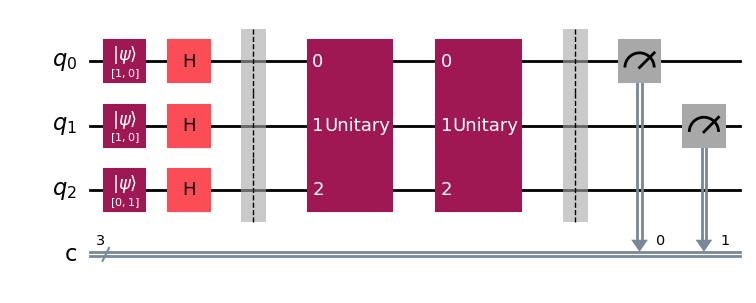

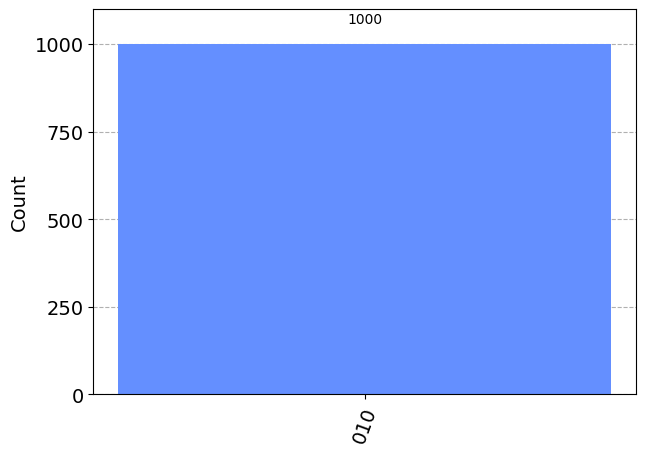

In [ ]:
import qiskit as qk
import numpy as np

from qiskit.quantum_info.operators import Operator

q = qk.QuantumRegister(3,'q')
c = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(q,c)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.h(1)

qc.initialize([0,1],2)
qc.h(2)

qc.barrier()
oracle = np.eye(8)
oracle[:,[2,6]] = oracle[:,[6,2]]
oracle = Operator(oracle)
qc.append(oracle,q)

# n = 2 (two digits number to look for)
A = np.ones(4*4).reshape(4,4)/4
I4 = np.eye(4)
R = 2*A - I4
I2 = np.eye(2)
boost = np.kron(I2,R)
boost = Operator(boost)
qc.append(boost,q)

qc.barrier()
qc.measure(q[:2],c[:2])

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend('aer_simulator')
results = simulator.run(qk.transpile(qc,simulator),shots=1000).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Example with $f(101) = 1$: Resolution with Python**

Start by putting three qubits in state $|x_2x_1x_0\rangle = |000\rangle$

In [ ]:
import numpy as np
x0 = np.array([[1,0]]).T
x1 = np.array([[1,0]]).T
x2 = np.array([[1,0]]).T
x2x1x0 = np.kron(x2,np.kron(x1,x0))
x2x1x0.T

array([[1, 0, 0, 0, 0, 0, 0, 0]])

Pass the three qubits by Hadamard gates and get state $|x\rangle = H^{\otimes 3}.|x_2x_1x_0\rangle$

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
H2 = np.kron(H,H)
H3 = np.kron(H,H2)
x = H3.dot(x2x1x0)
x.T

array([[0.354, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354, 0.354]])

Put a qubit in state $|y_0\rangle = |1\rangle$

In [ ]:
y0 = np.array([[0,1]]).T
y0.T

array([[0, 1]])

Pass qubit $y_0$ by a Hadamard gate and get state $|y\rangle = H.|y_0\rangle$.

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
y = H.dot(y0)
y.T

array([[ 0.707, -0.707]])

Combine states $|x\rangle$ and $|y\rangle$ by tensor product and get state $|\psi_0\rangle = |xy\rangle = |x\rangle \otimes |y\rangle$

In [ ]:
psi0 = np.kron(y,x)
psi0.T

array([[ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25, -0.25,
        -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25]])

The function is such that $f(101) = 1$. Therefore the transformation rule is:

$$\begin{array}{cccc|cccc}
y & x_2 & x_1 & x_0 & y & x_2 & x_1 & x_0 \\
\hline
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 \\
\hdashline
0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 1 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 & 1 & 1 & 1 \\
\hdashline
1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 1 & 1 & 0 & 1 & 1 \\
\hdashline
1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\
1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\hdashline
\end{array}$$

In other words, it is a [16;16] identity matrix with columns 5 and 13 swapped.

Pass state $|\psi_0\rangle$ by the Oracle and get state $|\psi_1\rangle = U.|\psi_0\rangle$

In [ ]:
oracle = np.eye(16)
oracle[:,[5,13]] = oracle[:,[13,5]]
psi1 = oracle.dot(psi0)
psi1.T

array([[ 0.25,  0.25,  0.25,  0.25,  0.25, -0.25,  0.25,  0.25, -0.25,
        -0.25, -0.25, -0.25, -0.25,  0.25, -0.25, -0.25]])

Create matrix $R = 2A-I$ which will represent the rotation around the mean. Take notice that this transformation will only be applied to the first, second and third qubits of state $|\psi_1\rangle$

In [ ]:
# n = 8
A = np.ones(8*8).reshape(8,8)/8
I8 = np.eye(8)
R = 2*A-I8
R

array([[-0.75,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75,  0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25, -0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25, -0.75]])

Since state $|\psi_1\rangle$'s fourth qubit will be left undisturbed, create a [2;2] identity matrix and a transformation $I_2 \otimes R$ which will act on qubit $|\psi_1\rangle$ to get state $|\psi_2\rangle = I_2 \otimes R.|\psi_1\rangle$. This transformation represents rotation around the mean.

In [ ]:
I2 = np.eye(2)
I2R = np.kron(I2,R)
psi2 = I2R.dot(psi1)
psi2.T

array([[ 0.125,  0.125,  0.125,  0.125,  0.125,  0.625,  0.125,  0.125,
        -0.125, -0.125, -0.125, -0.125, -0.125, -0.625, -0.125, -0.125]])

Probability of measuring the answering states (either $|0101\rangle$ or $|1101\rangle$ is now 78%.

In [ ]:
0.625**2 + 0.625**2

0.78125

Let's repeat once more phase inversion (the oracle) and rotation around the mean ($I_2 \otimes R$) to increase probability of getting the correct answer.

In [ ]:
psi3 = I2R.dot(oracle).dot(psi2)
psi3.T

array([[-0.062, -0.062, -0.062, -0.062, -0.062,  0.687, -0.062, -0.062,
         0.062,  0.062,  0.062,  0.062,  0.062, -0.687,  0.062,  0.062]])

Probability of measuring states $|0101\rangle$ or $|1101\rangle$ is now 94.4%. Since in this example, $x_0$ is a three digits number, the operations of phase inversion and rotation about the mean have to be made $\sqrt{2^3} \approx 2,83$ or $2$ times to reach maximum probability.

In [ ]:
0.687**2 + 0.687**2

0.9439380000000002

If we try doing the operation $(I_2 \otimes R).U$ again (rotation about the mean and phase inversion) we will notice that probability of getting correct answer decreases.

In [ ]:
I2R.dot(oracle).dot(psi3).T

array([[-0.219, -0.219, -0.219, -0.219, -0.219,  0.406, -0.219, -0.219,
         0.219,  0.219,  0.219,  0.219,  0.219, -0.406,  0.219,  0.219]])

In fact, if we keep doing this operation the probability of getting the correct answer oscillates. Let's show this through a graph. First we create an unique matrix $T$ which represents both operations such that $T = (I_2 \otimes R).U$ where U is the oracle function.

In [ ]:
T = I2R.dot(oracle)

Now start with $|\psi_1\rangle$ let's loop 25 times this transformation $T$. A each time we will calculate and save the probability of measuring either state $|0101\rangle$ or state $|1101\rangle$. After that we present the results in a `matplotlib` graph.

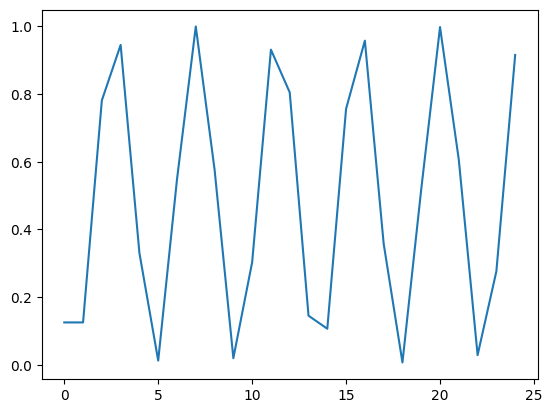

In [ ]:
psi = psi1
prob = []
for i in range(25):
  prob.append(psi[5,0]**2 + psi[13,0]**2)
  psi = T.dot(psi)

from matplotlib import pyplot as plt
plt.plot(list(range(25)), prob);

###### **Example with $f(101) = 1$. Resolution with Qiskit**

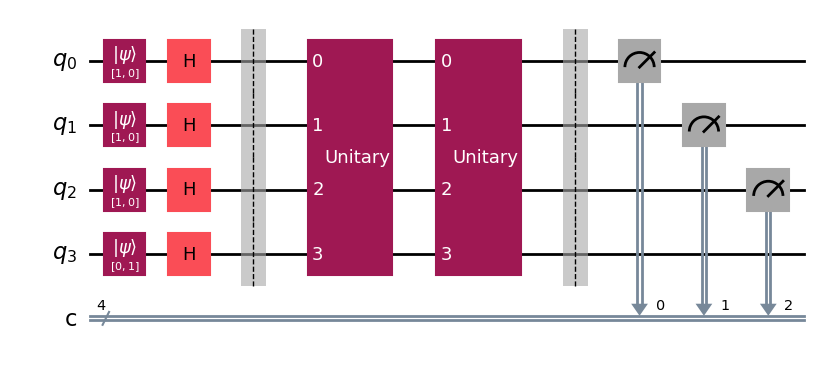

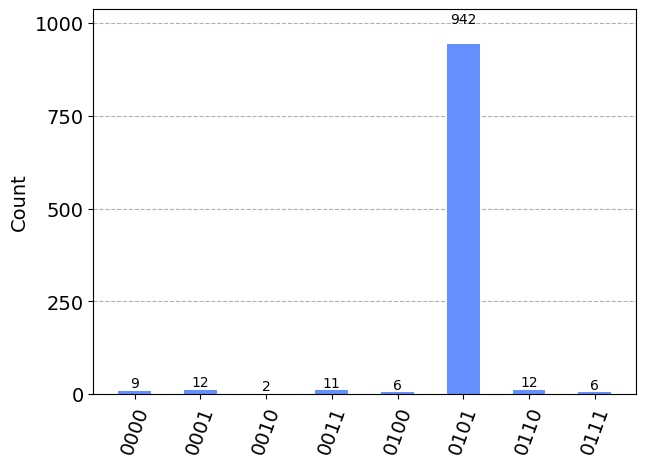

In [ ]:
import qiskit as qk
import numpy as np

from qiskit.quantum_info.operators import Operator

q = qk.QuantumRegister(4,'q')
c = qk.ClassicalRegister(4,'c')
qc = qk.QuantumCircuit(q,c)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
qc.h(0)
qc.h(1)
qc.h(2)

qc.initialize([0,1],3)
qc.h(3)

qc.barrier()

# Create oracle matrix
oracle = np.eye(16)
oracle[:,[5,13]] = oracle[:,[13,5]]

# Create rotation about the mean matrix
# n = 3 (three digits number to look for)
A = np.ones(8*8).reshape(8,8)/8
I8 = np.eye(8)
R = 2*A - I8

# Identity matrix to leave fourth qubit undisturbed
I2 = np.eye(2)

# Create second transformation matrix
boost = np.kron(I2,R)

# Combine oracle with second transformation matrix in
#  an unique operator
T = boost.dot(oracle)
T = Operator(T)

# Apply operator twice (2 phase inversions and
#  rotations about the mean)
qc.append(T,q)
qc.append(T,q)

qc.barrier()
qc.measure(q[:3],c[:3])

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend('aer_simulator')
results = simulator.run(qk.transpile(qc,simulator),shots=1000).result().get_counts()
qk.visualization.plot_histogram(results)

###### **Example with $f(1101) = 1$. Resolution with Qiskit**

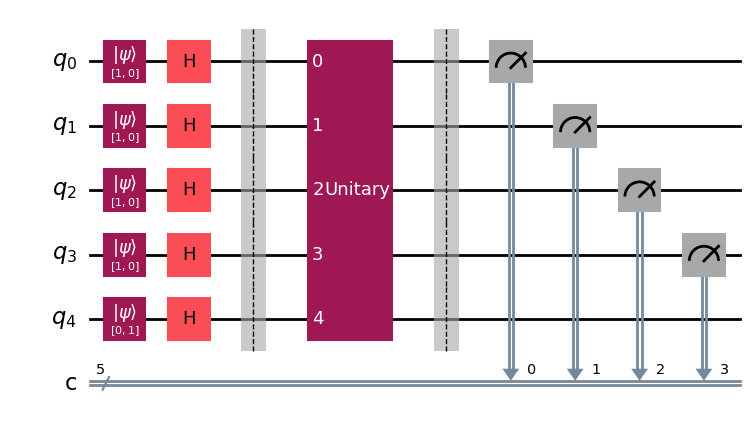

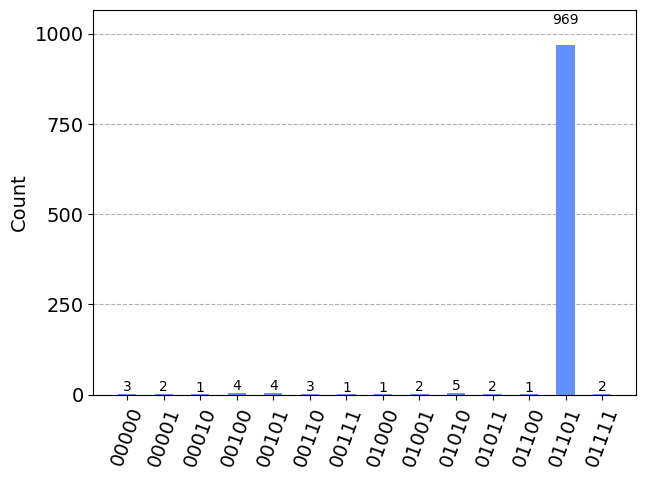

In [ ]:
import qiskit as qk
import numpy as np

from qiskit.quantum_info.operators import Operator

q = qk.QuantumRegister(5,'q')
c = qk.ClassicalRegister(5,'c')
qc = qk.QuantumCircuit(q,c)

qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
qc.initialize([1,0],3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

qc.initialize([0,1],4)
qc.h(4)

qc.barrier()

# Create oracle matrix
oracle = np.eye(32)
oracle[:,[13,29]] = oracle[:,[29,13]]

# Create rotation about the mean matrix
# n = 4 (four digits number to look for)
A = np.ones(16*16).reshape(16,16)/16
I16 = np.eye(16)
R = 2*A - I16

# Identity matrix to leave fifth qubit undisturbed
I2 = np.eye(2)

# Create second transformation matrix
boost = np.kron(I2,R)

# Combine oracle with second transformation matrix in
#  an unique operator
T = boost.dot(oracle)

# n = 4. Therefore it will be necessary 4 T operations
#  to get maximum probability.
Tn = T.dot(T).dot(T)
Tn = Operator(Tn)

# Apply operator Tn once (n phase inversions and
#  rotations about the mean)
qc.append(Tn,q)

qc.barrier()
qc.measure(q[:4],c[:4])

display(qc.draw('mpl'))

simulator = qk_aer.Aer.get_backend('aer_simulator')
results = simulator.run(qk.transpile(qc,simulator),shots=1000).result().get_counts()
qk.visualization.plot_histogram(results)

##### **Shor's Factoring Algorithm**

###### **Introduction**

The importance of Shor's algorithm resides in the fact that WWW security systems are based on the assumption that it is hard to factor integers. Shor's algorithm as we shall see shows a way to factor integers in polynomial time.

Let's see how a number can be factored from a classical point of view. Suppose we want to factor number $35$. So $N=35$

###### **The Greatest Common Divider Algorithm a.k.a. Euclid's Algorithm**

We start by choosing a number smaller than $N=35$, for example $a=6$. Let's check if $a=6$ and $N=35$ share a common prime factor. To do this we will use an algorithm due to Euclid.

First we calculate the difference between $N$ and $a$. In this case $N-a=29$. We have now three numbers: $6, 35, 29$. Take again the difference between the two smaller numbers and get: $29 - 6 = 23$. Repeat the process until the difference is equal to $0$. The number just before $0$ is $1$. This is the greatest common factor between $35$ and $6$. Therefore we say that $35$ and $6$ are *coprimes*.

In [ ]:
import numpy as np
import pandas as pd
N = 35; a = 6

GCD = pd.DataFrame({'N':[N], 'a':[a], 'N-a':[N-a]})

while GCD.iloc[-1,2] != 0:
  temp = GCD.iloc[-1].values
  temp = np.sort(temp); temp[-1] = temp[-2] - temp[-3]
  temp = pd.DataFrame(data = temp.reshape(-1,3), columns = ['N','a','N-a'])
  GCD = GCD.append(temp, ignore_index=True)

GCD

<ipython-input-140-404c6ffa42ad>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)
<ipython-input-140-404c6ffa42ad>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)
<ipython-input-140-404c6ffa42ad>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)
<ipython-input-140-404c6ffa42ad>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)
<ipython-input-140-404c6ffa42ad>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

,N,a,N-a
0,35,6,29
1,6,29,23
2,6,23,17
3,6,17,11
4,6,11,5
5,5,6,1
6,1,5,4
7,1,4,3
8,1,3,2
9,1,2,1


As another example of this algorithm, let's suppose we want to calculate the greatest common factor between $9$ em $15$ which we know it is $3$. If we run it again we will see that just before the $0$ we get $3$ as expected.

In [ ]:
import numpy as np
import pandas as pd
N = 15; a = 9

GCD = pd.DataFrame({'N':[N], 'a':[a], 'N-a':[N-a]})

while GCD.iloc[-1,2] != 0:
  temp = GCD.iloc[-1].values
  temp = np.sort(temp); temp[-1] = temp[-2] - temp[-3]
  temp = pd.DataFrame(data = temp.reshape(-1,3), columns = ['N','a','N-a'])
  GCD = GCD.append(temp, ignore_index=True)

GCD

<ipython-input-141-46a8d2665ca5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)
<ipython-input-141-46a8d2665ca5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)
<ipython-input-141-46a8d2665ca5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GCD = GCD.append(temp, ignore_index=True)


,N,a,N-a
0,15,9,6
1,6,9,3
2,3,6,3
3,3,3,0


These operations can be done with `numpy`'s function `gcd`

In [ ]:
import numpy as np
np.gcd(6,35), np.gcd(9,15)

(1, 3)

###### **Getting better factoring guesses of $N$**

The GCD algorithm is important to us because it let us use a number ($a$) to quickly test if it has one or more common factors with the number we want to factor ($N$). As we have seen our initial guess ($a = 6$) does not have any common factor with $N=35$.

Let's try creating a way of generating better factor guesses for our number $N$. Our objective here is to find two numbers ($g_1$ and $g_1$) such that each of them share a common factor with $x$.

$a=6$ and $N=35$ are integers. Let's suppose that there are also two other integers, $p$ and $m$ (unknown), that together with $N$ and $a$ satisfy the relationship below:

$$a^p = m.N + 1$$

From this last expression we can rearrange terms to make:

$$a^p-1 = m.N$$

$$(a^{p/2}-1).(a^{p/2}+1) = m.x$$

Our guesses are now $g_1 = a^{p/2}-1$ and $g_2=a^{p/2}+1$. Since we want $g_1$ and $g_2$ to be integers, $p$ must be even.

In this example $a=6$ and $N=35$. Let's suppose that we now choose $p=6$. Then $g_1=215$ and $g_2=217$. From this two guesses we can calculate the GCD between 215 and 35 which is 5, and the GCD between 217 and 35 which is 7 (see below calculations using `numpy`). And of course $7$ times $5$ is $35$. We have factored our number.

In [ ]:
import numpy as np
np.gcd(215,35), np.gcd(217,35)

(5, 7)

The question that remains is: starting from an arbitrary number $a$ how can we quickly choose an appropriate even number for $p$, such that $(a^{p/2}-1).(y^{p/2}+1) = m.N$?

###### **Modular Arithmetic: Dealing with the remainder of a division**

Modular Arithmetic or the division remainder arithmetic is a very specific area of mathematics. Few people dealt with it up to the mid XXth century. After that time it gained proeminence because it is directly related to the factorization problem. And the factorization problem is at the heart and soul of internet's security systems.

The main operation is called $\bmod$. When you $\bmod$ two numbers you calculate the division remainder of them. For instance: $20 \bmod 7 = 6$. In Python this is done using the $\%$ operator.

In [ ]:
20 % 7

6

Using $\bmod$ operation and set logic one can create *equivalences* between numbers. This kind of operation seems strange at first sight but is well according math rules. For instance $17 \equiv 2 \bmod 15$. This expression means that $17$ is *equivalent* to $2$ when both are considered under the rules of $\bmod 15$ operation. In fact $17 \bmod 15 = 2 \bmod 15$.

###### **$f(x) = a^x \bmod N$ is periodic if $a$ and $N$ are coprimes**

An intersting result appears when we consider a function like $f(x) = a^x \bmod N$ if $a$ and $N$ are coprimes. Below we calculate several values of $f(x)$ for $a=2$ and $N=15$. As you can see, $\bmod$ is a periodic function. In this example the period of $f(x)$ is $r=4$ because $f(x+r) = f(x)$

In [ ]:
import numpy as np
f = lambda x,a,N: a**x % N

[f(x,2,15) for x in range(10)]

[1, 2, 4, 8, 1, 2, 4, 8, 1, 2]

###### **Calculating values of $f(x) = a^x \bmod N$**

Let's do another example and learn some $\bmod$ tricks. Suppose we want to calculate $f(x) = 2^x \bmod 371$. Trying to calculate $2^x$ directly may not be a good idea because the numbers will get to big very quickly. What can we do here?

Suppose numbers $a_1$, $a_0$, $b_1$, $b_0$ and $N$ such that:

$$a_1 \equiv a_0 \bmod N$$

$$b_1 \equiv b_0 \bmod N$$


Replacing values $a_1$ and $b_1$ by their equivalents, one can calculate $(a_1.b_1) \bmod N$ as:

$$(a_1 . b_1) \bmod N = (a_0 \bmod N) . (b_0 \bmod N) \bmod N$$

For instance:

$$13 \bmod 11 =  2 \bmod 11$$

$$35 \bmod 11 = 24 \bmod 11$$

$$(13.35) \bmod 11 = (2 \bmod 11).(24 \bmod 11) \bmod 11$$

See below this example calculated in Python:

In [ ]:
import numpy as np
(13*35)%11, ((2%11)*(24%11))%11

(4, 4)

Therefore to calculate for instance $2^x \bmod 371$ one does:

$$2^0 \bmod 371 = 1$$

$$2^1 \bmod 371 = (2 \bmod 371).(2^0 \bmod 371) \bmod 371 = 2$$

$$2^2 \bmod 371 = (2 \bmod 371).(2^1 \bmod 371) \bmod 371 = 4$$

$$2^3 \bmod 371 = (2 \bmod 371).(2^2 \bmod 371) \bmod 371 = 8$$

$$...$$

$$2^x \bmod 371 = (2 \bmod 371).(2^{x-1} \bmod 371) \bmod 371$$


See below in Python

In [ ]:
import numpy as np

def f(x,a,N):
  a0 = 1
  for i in range(x):
    a0 = ((a%N)*(a0))%N
  return(a0)

[f(x,2,371) for x in range(8)]

[1, 2, 4, 8, 16, 32, 64, 128]

In [ ]:
[f(x,2,371) for x in range(154,159)]

[93, 186, 1, 2, 4]

In [ ]:
[f(x,24,371) for x in range(77,81)]

[201, 1, 24, 205]

###### **Finding the period of $f(x) = a^x \bmod N$**

If $f_{a,N}(x) = a^x \bmod N$ then $f_{a,N}(0) = 1$. If $a$ and $N$ are coprimes then $f_{a,N}(x)$ is periodic. This means that for some $r$, $f_{a,N}(x+r) = f_{a,N}(x)$. To find $f_{a,N}(x)$'s period one should try each number $x$ from $0$ up to some $r$ such that $f(r)$ is equal to $1$ again.  

In [ ]:
import numpy as np

def fr(a,N):
  ax = ((a%N)*(1))%N
  x = 1
  while ax != 1:
    ax = ((a%N)*(ax))%N
    x = x+1
  return(x)

fr(2,371), fr(6,371), fr(24,371)

(156, 26, 78)

###### **Connecting the dots: Factoring $N=35$**

Now let's return to the problem of factoring $N=35$. Let's start with a coprime factor of $N$, for instance $a=6$. We defined a relationshinp between $N$, $a$ and two numbers $x$ and $m$, all of them integers, which was:

$$ a^x = m.N + 1$$



Based on the relationship above and the fact that all numbers in it are supposed to be integers, we can say that we are looking for some number $x$ such that, given two coprime numbers $a$ and $N$:

$$ a^x \bmod N = 1$$

In other words, our new guesses will be calculated from the period $x=r$ of $f_{a,N}(x)$

We rearranged terms in the above expression and got:

$$(a^{x/2}-1).(a^{x/2}+1) = m.N$$

$a^{x/2}-1$ and $a^{x/2}+1$ will be our new guesses for numbers that will share a common factor with N.

Now here comes the "trick". The number $x$ is such that $a^x \bmod N = 1$. We learned in the previous section that $\bmod$ function when $a$ and $N$ are coprimes is periodic. The period can be discovered by searching the value of $x$ such that $f(x)=1$. So what we need to do in order to find "good guesses" for numbers that share a common factor with $N$ is to find the period $r$ of $f(x) = a^x \bmod N$.

Upon finding this $x$ we can calculate our guesses and from them find the factors of $N$. See below.

In [ ]:
import numpy as np

def fr(a,N):
  a0 = 1
  a0 = ((a%N)*a0)%N
  x = 2
  find = False
  while find==False:
    a0 = ((a%N)*(a0))%N
    if a0 == 1:
      find = True
    x = x+1
  return(x-1)

N = 35
a = 2
fr(a,N)

12

Period of $f_{2,35}(x)$ is $12$. Therefore our guesses will be:

In [ ]:
2**(12/2)-1, 2**(12/2)+1

(63.0, 65.0)

Calculating the GCD between each of our guesses and $N=35$ we get:

In [ ]:
np.gcd(63,35), np.gcd(65,35)

(7, 5)

And 7 times 5 is...35! VOILÁ!

###### **Example: Factoring $N=247$**

In [ ]:
import numpy as np
# Function to calculate the period of f(x) = a^x MOD N
def fr(a,N):
  a1 = ((a%N)*(1))%N
  x = 1
  while a1 != 1:
    a1 = ((a%N)*a1)%N
    x = x+1
  return(x)

# Function to factor N based on a
def factor(N, a=2):
  r = fr(a,N)
  g1 = a**(int(r/2)) - 1
  g2 = a**(int(r/2)) + 1
  f1 = np.gcd(g1,N)
  f2 = np.gcd(g2,N)
  return(f1,f2, f1*f2)

factor(247)

(19, 13, 247)

In [ ]:
factor(1045)

(209, 5, 1045)

###### **The Quantum Part: How to quickly find the period of $f(x) = a^x \bmod N$**

Now let's move to the world of qubits and try tackling with this problem. We have a function $f(x) = a^x \bmod N$, where $a$ and $N$ are supposed to be coprimes. If this condition is met, $f(x)$ will be periodic. This means that for some value $r$, $f(x) = f(x+r)$. We want to find its period $r$.

Our function $f_{a,N}(x)$ is such that for any value of $a$ and $N$, $f(0)=1$. Also, since it is the remainder of a division by $N$, its maximum value is $N$. Therefore to deal with $f(x)$'s results we will need a binary number with $n = \log_{2}N$ numbers.

Our function is $f(x) = a^x \bmod N$. We need $n = log_{2}N$ bits to evaluate $f(x)$'s results. The period $r$ has a maximum value equal to $N$. Therefore at first sight we would need a $n$ bits $x$ number. For reasons that will become clearer later when we discuss the so called QFT (Quantum Fourier Transform), we in fact will need $x$ to be a $2n$ bits number.

Since $n = log_{2}N$ then $m = 2n = 2 log_{2}N = log_{2}N^2$. Therefore instead of the range $0...N$, we will evaluate it in $0...N^2$ .  

Our circuit will be in principle "simple". It will be composed by an $|x\rangle_{m}$ vector with $m$ bits and an $|y\rangle_{n}$ vector with $n$ bits, both of them initialized in the state $|0\rangle$. Mathematically speaking we have:

$$|\psi_0\rangle = |y\rangle_{n} \otimes |x\rangle_{m} = |0\rangle_{n} \otimes |0\rangle_{m}$$

In [ ]:
import numpy as np
N = 15 # number to be factored
n = 4  # number of bits necessary to represent N
m = 8  # number of bits necessary to represent N^2
x = np.zeros(2**m).reshape(-1,1)
x[0,0] = 1
x.shape # since x is a 2^8 = 256 positions vector it will not be showed here

(256, 1)

In [ ]:
y = np.zeros(2**n).reshape(-1,1)
y[0,0] = 1; y.T # y is a 2^4 = 16 positions vector shown below

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
psi0 = np.kron(y,x)
psi0.shape # psi0 is a 256 x 16 = 4.096 positions vector

(4096, 1)

Vector $|x\rangle_{m}$ will be placed in a superposition of all its base states. Vector $|y\rangle_{n}$ will be left undisturbed. Therefore our circuit's next state will be:

$$|\psi_1\rangle = I_n|y\rangle_{n} \otimes H^{\otimes m}|x\rangle_{m}$$

$$|\psi_1\rangle = I_n \otimes H^{\otimes m}.|y\rangle_n \otimes |x\rangle_m$$

$$|\psi_1\rangle = I_n \otimes H^{\otimes m}.|\psi_0\rangle$$

In [ ]:
In = np.eye(2**n); In.shape

(16, 16)

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2)
Hm = H.copy()
for i in range(1,m):
  Hm = np.kron(Hm,H)

Hm.shape

(256, 256)

In [ ]:
psi1 = np.kron(In,Hm).dot(psi0); psi1.shape

(4096, 1)

Next comes the "oracle" $U_f$. The output of $U_f$ is such that  